In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import mplfinance as mpf


In [2]:
# Read into DataFrame
from io import StringIO
df = pd.read_csv(os.path.join("data", "QQQ_1min_firstratedata.csv"), parse_dates=['timestamp'])

# Set timestamp as index
df.set_index('timestamp', inplace=True)

df

open      high     low   close  volume
timestamp                                                      
2022-09-30 04:00:00  274.0000  274.8400  274.00  274.65    5209
2022-09-30 04:01:00  274.7000  274.7300  274.63  274.68   12542
2022-09-30 04:02:00  274.6100  274.6100  274.48  274.50    7092
2022-09-30 04:03:00  274.4700  274.5200  274.42  274.47    9774
2022-09-30 04:04:00  274.5500  274.6100  274.55  274.55     500
...                       ...       ...     ...     ...     ...
2023-09-29 19:37:00  358.5400  358.5400  358.54  358.54     150
2023-09-29 19:40:00  358.5800  358.5800  358.58  358.58    1100
2023-09-29 19:41:00  358.6499  358.6499  358.60  358.60    2700
2023-09-29 19:46:00  358.5700  358.5900  358.57  358.59    1736
2023-09-29 19:47:00  358.5900  358.6500  358.59  358.65     758

[210482 rows x 5 columns]

In [8]:
df_sample = df.head(100)
df_sample

open    high     low   close  volume
timestamp                                                  
2022-09-30 04:00:00  274.00  274.84  274.00  274.65    5209
2022-09-30 04:01:00  274.70  274.73  274.63  274.68   12542
2022-09-30 04:02:00  274.61  274.61  274.48  274.50    7092
2022-09-30 04:03:00  274.47  274.52  274.42  274.47    9774
2022-09-30 04:04:00  274.55  274.61  274.55  274.55     500
...                     ...     ...     ...     ...     ...
2022-09-30 05:47:00  273.81  273.82  273.77  273.81    2800
2022-09-30 05:48:00  273.82  273.82  273.82  273.82     200
2022-09-30 05:53:00  273.78  273.78  273.78  273.78     100
2022-09-30 05:56:00  273.50  273.50  273.50  273.50     188
2022-09-30 05:58:00  273.44  273.44  273.39  273.39    2800

[100 rows x 5 columns]

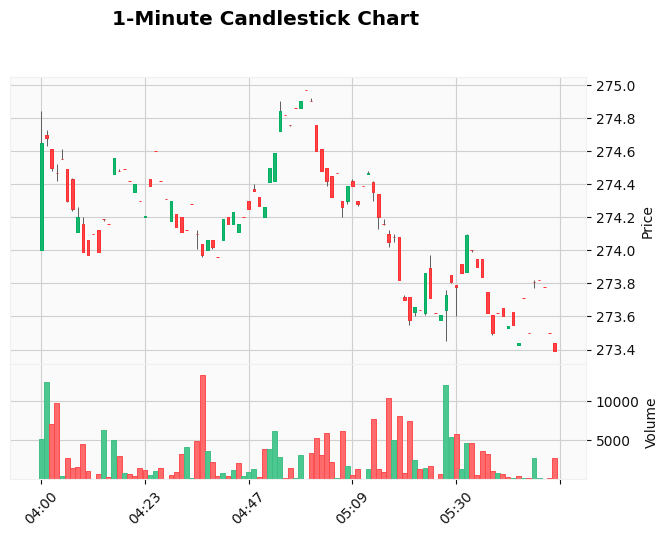

In [4]:

mpf.plot(
    df_sample,
    type='candle',  # or 'ohlc'
    style='yahoo',
    title='1-Minute Candlestick Chart',
    ylabel='Price',
    volume=True
)

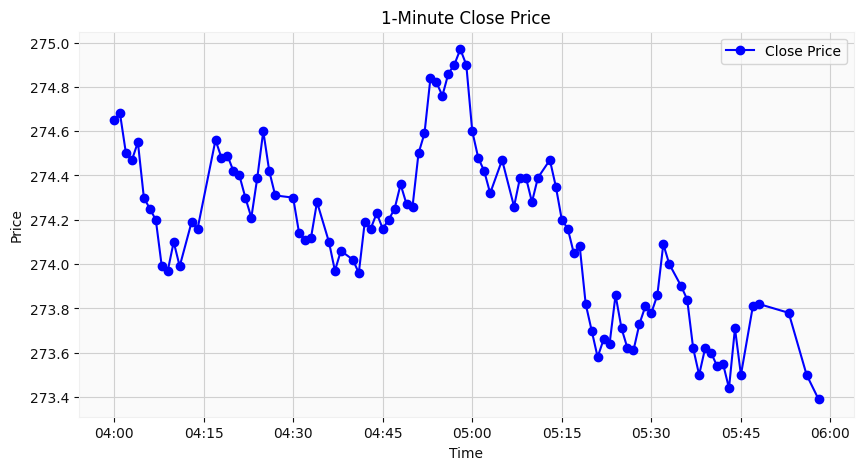

In [9]:
# Plot close price line
plt.figure(figsize=(10,5))
plt.plot(df_sample.index, df_sample['close'], marker='o', label='Close Price', color='blue')
plt.title('1-Minute Close Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.show()

In [10]:
subset = df.loc['2022-09-30 09:30:00':'2022-09-30 16:00:00']
print(subset)

                         open     high     low     close   volume
timestamp                                                        
2022-09-30 09:30:00  271.0300  271.430  270.74  271.4300   546066
2022-09-30 09:31:00  271.4400  271.680  271.30  271.5350   270975
2022-09-30 09:32:00  271.5786  271.780  271.09  271.2500   232907
2022-09-30 09:33:00  271.2700  272.270  271.26  272.2400   326439
2022-09-30 09:34:00  272.2400  272.465  272.02  272.1200   244485
...                       ...      ...     ...       ...      ...
2022-09-30 15:56:00  267.6000  267.610  267.33  267.3300   567503
2022-09-30 15:57:00  267.3300  267.430  267.12  267.2950   943678
2022-09-30 15:58:00  267.2950  267.380  267.12  267.1589  1225670
2022-09-30 15:59:00  267.1500  267.590  267.10  267.1800  2240383
2022-09-30 16:00:00  267.2100  267.660  267.10  267.6500   800012

[391 rows x 5 columns]


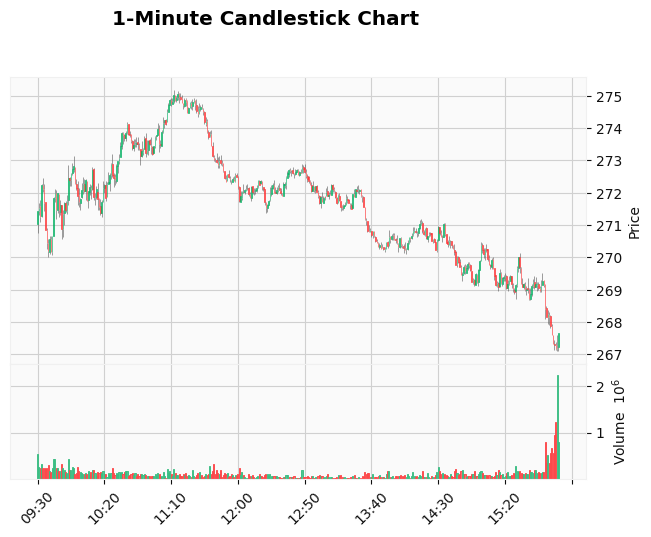

In [11]:
mpf.plot(
    subset,
    type='candle',  # or 'ohlc'
    style='yahoo',
    title='1-Minute Candlestick Chart',
    ylabel='Price',
    volume=True
)

In [12]:
# Simple Moving Averages
df['MA10'] = df['close'].rolling(window=10).mean()
df['MA20'] = df['close'].rolling(window=20).mean()

# Typical price for each row
df['typical_price'] = (df['high'] + df['low'] + df['close']) / 3
# Cumulative VWAP
df['VWAP'] = (df['typical_price'] * df['volume']).cumsum() / df['volume'].cumsum()

df

open      high     low   close  volume     MA10  \
timestamp                                                                  
2022-09-30 04:00:00  274.0000  274.8400  274.00  274.65    5209      NaN   
2022-09-30 04:01:00  274.7000  274.7300  274.63  274.68   12542      NaN   
2022-09-30 04:02:00  274.6100  274.6100  274.48  274.50    7092      NaN   
2022-09-30 04:03:00  274.4700  274.5200  274.42  274.47    9774      NaN   
2022-09-30 04:04:00  274.5500  274.6100  274.55  274.55     500      NaN   
...                       ...       ...     ...     ...     ...      ...   
2023-09-29 19:37:00  358.5400  358.5400  358.54  358.54     150  358.498   
2023-09-29 19:40:00  358.5800  358.5800  358.58  358.58    1100  358.506   
2023-09-29 19:41:00  358.6499  358.6499  358.60  358.60    2700  358.526   
2023-09-29 19:46:00  358.5700  358.5900  358.57  358.59    1736  358.536   
2023-09-29 19:47:00  358.5900  358.6500  358.59  358.65     758  358.553   

                         MA20  typical_price        VWAP  
timestamp                                                 
2022-09-30 04:00:00       NaN     274.496667  274.496667  
2022-09-30 04:01:00       NaN     274.680000  274.626201  
2022-09-30 04:02:00       NaN     274.530000  274.598738  
2022-09-30 04:03:00       NaN     274.470000  274.562389  
2022-09-30 04:04:00       NaN     274.570000  274.562498  
...                       ...            ...         ...  
2023-09-29 19:37:00  358.5590     358.540000  317.113046  
2023-09-29 19:40:00  358.5550     358.580000  317.113050  
2023-09-29 19:41:00  358.5535     358.616633  317.113061  
2023-09-29 19:46:00  358.5490     358.583333  317.113068  
2023-09-29 19:47:00  358.5475     358.630000  317.113071  

[210482 rows x 9 columns]

In [13]:
subset = df.loc['2022-09-30 09:30:00':'2022-09-30 16:00:00']
print(subset)

                         open     high     low     close   volume       MA10  \
timestamp                                                                      
2022-09-30 09:30:00  271.0300  271.430  270.74  271.4300   546066  271.17200   
2022-09-30 09:31:00  271.4400  271.680  271.30  271.5350   270975  271.19350   
2022-09-30 09:32:00  271.5786  271.780  271.09  271.2500   232907  271.20850   
2022-09-30 09:33:00  271.2700  272.270  271.26  272.2400   326439  271.29850   
2022-09-30 09:34:00  272.2400  272.465  272.02  272.1200   244485  271.38750   
...                       ...      ...     ...       ...      ...        ...   
2022-09-30 15:56:00  267.6000  267.610  267.33  267.3300   567503  268.32899   
2022-09-30 15:57:00  267.3300  267.430  267.12  267.2950   943678  268.14649   
2022-09-30 15:58:00  267.2950  267.380  267.12  267.1589  1225670  267.93638   
2022-09-30 15:59:00  267.1500  267.590  267.10  267.1800  2240383  267.73938   
2022-09-30 16:00:00  267.2100  267.660  

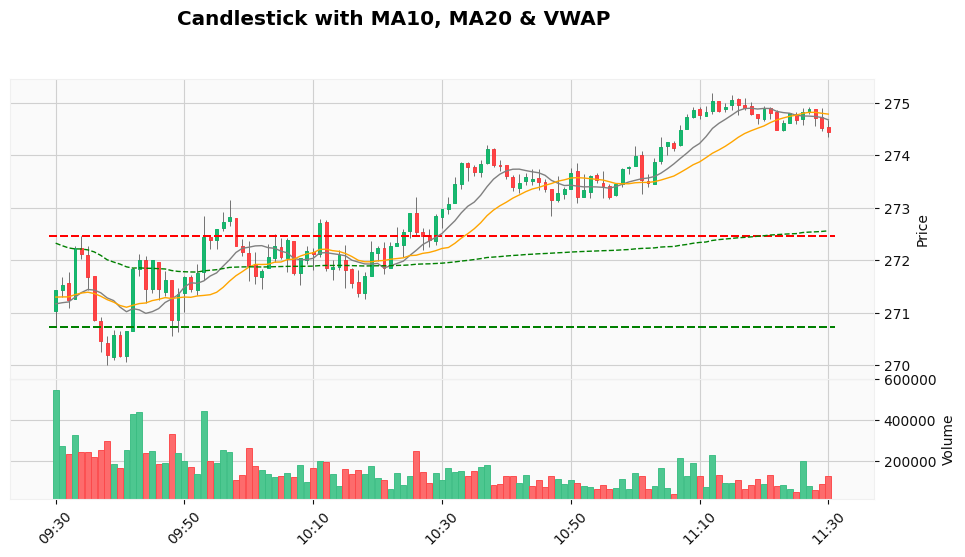

In [20]:
import mplfinance as mpf

def plot_range(subset):
    # Define additional lines to plot
    addplots = [
        mpf.make_addplot(subset['MA10'], color='grey', width=1.0, linestyle='solid'),
        mpf.make_addplot(subset['MA20'], color='orange', width=1.0, linestyle='solid'),
        mpf.make_addplot(subset['VWAP'], color='green', width=1.0, linestyle='dashed')
    ]

    # Assume df has datetime index
    open_range = subset.iloc[:5]  # first 5 rows = first 5 minutes
    open_range_high = open_range['high'].max()
    open_range_low = open_range['low'].min()

    # Add horizontal lines at open range high and low
    hlines = dict(hlines=[open_range_high, open_range_low], colors=['red','green'], linestyle='dashed')

    # Plot candlestick chart with moving averages and VWAP
    mpf.plot(
        subset,
        type='candle',
        style='yahoo',
        volume=True,
        addplot=addplots,
        hlines=hlines,
        title='Candlestick with MA10, MA20 & VWAP',
        ylabel='Price',
        ylabel_lower='Volume',
        figsize=(12,6)
    )

plot_range(subset)

                         open     high       low     close  volume       MA10  \
timestamp                                                                       
2022-09-30 09:30:00  271.0300  271.430  270.7400  271.4300  546066  271.17200   
2022-09-30 09:31:00  271.4400  271.680  271.3000  271.5350  270975  271.19350   
2022-09-30 09:32:00  271.5786  271.780  271.0900  271.2500  232907  271.20850   
2022-09-30 09:33:00  271.2700  272.270  271.2600  272.2400  326439  271.29850   
2022-09-30 09:34:00  272.2400  272.465  272.0200  272.1200  244485  271.38750   
...                       ...      ...       ...       ...     ...        ...   
2022-09-30 11:26:00  274.6900  274.900  274.5700  274.8200  198134  274.74749   
2022-09-30 11:27:00  274.8200  274.920  274.7800  274.8795   77969  274.74544   
2022-09-30 11:28:00  274.8800  274.880  274.5600  274.7100   54341  274.73745   
2022-09-30 11:29:00  274.7200  274.900  274.4704  274.5200   83641  274.71795   
2022-09-30 11:30:00  274.530

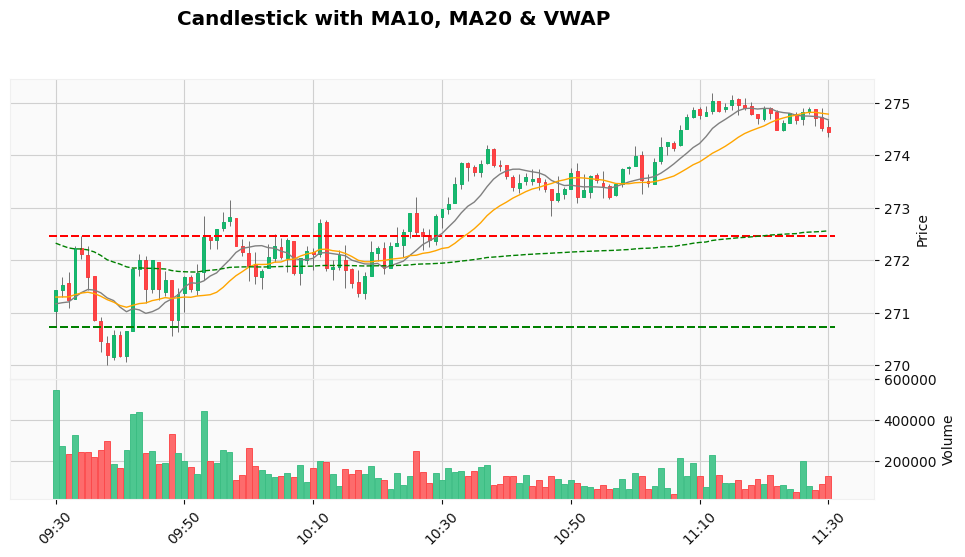

In [21]:
subset = df.loc['2022-09-30 09:30:00':'2022-09-30 11:30:00']
print(subset)
plot_range(subset)

In [43]:
from matplotlib.gridspec import GridSpec


def plot_side_by_side(subset_qqq, subset_spy, save_dir, fig_name):
    # 2. Create figure and add subplots
    fig = mpf.figure(style='yahoo', figsize=(18, 9))
    # gs = GridSpec(2, 2, figure=fig, height_ratios=[3, 1], width_ratios=[1, 1])

    # Create axes for each main plot and its corresponding volume plot
    ax1 = fig.add_subplot(2, 2, 1) # 2 rows, 2 columns, 1st subplot (main plot 1)
    ax2 = fig.add_subplot(2, 2, 2) # 2 rows, 2 columns, 2nd subplot (main plot 2)
    volume_ax1 = fig.add_subplot(2, 2, 3, sharex=ax1) # 2 rows, 2 columns, 3rd subplot (volume plot 1)
    volume_ax2 = fig.add_subplot(2, 2, 4, sharex=ax2) # 2 rows, 2 columns, 4th subplot (volume plot 2)

    # 3. Create addplots for each DataFrame, specifying the axis
    def get_addplots(subset, ax):
        addplots = [
            mpf.make_addplot(subset['MA10'], ax=ax, color='grey', width=1.0, linestyle='solid'),
            mpf.make_addplot(subset['MA20'], ax=ax, color='orange', width=1.0, linestyle='solid'),
            mpf.make_addplot(subset['VWAP'], ax=ax, color='purple', width=1.0, linestyle='dashed')
        ]
        return addplots

    addplots1 = get_addplots(subset_spy, ax=ax1)
    addplots2 = get_addplots(subset_qqq, ax=ax2)

    # 4. Define hlines for each plot
    def get_hlines(subset):
        open_range = subset.iloc[:5]
        open_range_high = open_range['high'].max()
        open_range_low = open_range['low'].min()
        hlines = dict(hlines=[open_range_high, open_range_low], colors=['red', 'green'], linestyle='dashed')
        return hlines

    hlines1 = get_hlines(subset_spy)
    hlines2 = get_hlines(subset_qqq)

    # 5. Plot each DataFrame on its own set of axes
    mpf.plot(subset_spy, type='candle', ax=ax1, volume=volume_ax1, addplot=addplots1, hlines=hlines1, axtitle=fig_name[:-4] + '_spy')
    mpf.plot(subset_qqq, type='candle', ax=ax2, volume=volume_ax2, addplot=addplots2, hlines=hlines2, axtitle=fig_name[:-4] + '_qqq')

    # Adjust layout for better display
    fig.tight_layout()
    # plt.show()
    fig.savefig(os.path.join(save_dir, fig_name), dpi=100) # Use plt.savefig(..) instead if not using external axes mode



In [34]:
df_qqq = pd.read_csv(os.path.join("data", "QQQ_1min_firstratedata.csv"), parse_dates=['timestamp'])
df_spy = pd.read_csv(os.path.join("data", "SPY_1min_firstratedata.csv"), parse_dates=['timestamp'])

# Set timestamp as index
df_qqq.set_index('timestamp', inplace=True)
df_spy.set_index('timestamp', inplace=True)


def compute_mas(df):
    # Simple Moving Averages
    df['MA10'] = df['close'].rolling(window=10).mean()
    df['MA20'] = df['close'].rolling(window=20).mean()

    # Typical price for each row
    df['typical_price'] = (df['high'] + df['low'] + df['close']) / 3
    # Cumulative VWAP
    df['VWAP'] = (df['typical_price'] * df['volume']).cumsum() / df['volume'].cumsum()

    return df

compute_mas(df_qqq)
compute_mas(df_spy)
df_spy.head(100)

open    high     low   close  volume     MA10  \
timestamp                                                              
2022-09-30 04:00:00  366.02  366.13  366.02  366.08    8354      NaN   
2022-09-30 04:01:00  366.11  366.13  366.07  366.13    1100      NaN   
2022-09-30 04:02:00  365.98  365.98  365.87  365.91     600      NaN   
2022-09-30 04:03:00  365.98  366.06  365.87  366.06    1800      NaN   
2022-09-30 04:04:00  366.07  366.07  366.02  366.02     223      NaN   
...                     ...     ...     ...     ...     ...      ...   
2022-09-30 05:54:00  365.23  365.23  365.13  365.19     800  365.278   
2022-09-30 05:58:00  364.90  364.95  364.90  364.94     550  365.247   
2022-09-30 05:59:00  365.11  365.18  365.11  365.18     900  365.250   
2022-09-30 06:00:00  365.20  365.20  365.20  365.20     100  365.264   
2022-09-30 06:02:00  365.45  365.45  365.45  365.45     100  365.298   

                         MA20  typical_price        VWAP  
timestamp                                                 
2022-09-30 04:00:00       NaN     366.076667  366.076667  
2022-09-30 04:01:00       NaN     366.110000  366.080545  
2022-09-30 04:02:00       NaN     365.920000  366.070964  
2022-09-30 04:03:00       NaN     365.996667  366.059682  
2022-09-30 04:04:00       NaN     366.036667  366.059257  
...                       ...            ...         ...  
2022-09-30 05:54:00  365.3870     365.183333  365.811376  
2022-09-30 05:58:00  365.3720     364.930000  365.808288  
2022-09-30 05:59:00  365.3660     365.156667  365.804574  
2022-09-30 06:00:00  365.3465     365.200000  365.804191  
2022-09-30 06:02:00  365.3435     365.450000  365.803967  

[100 rows x 9 columns]

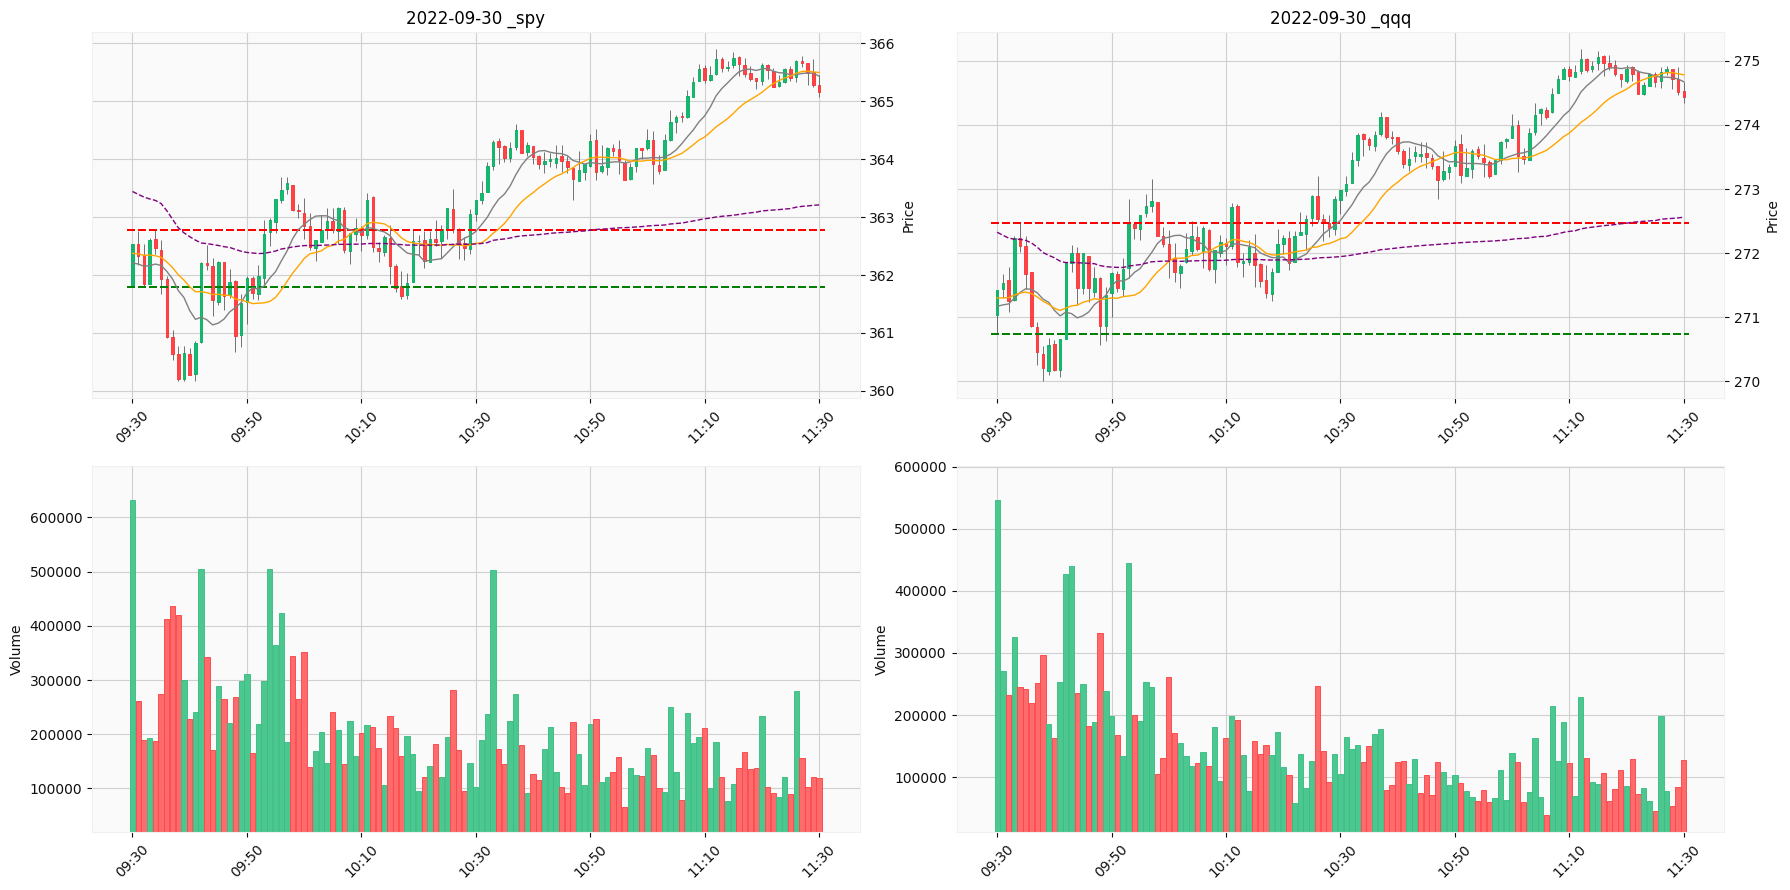

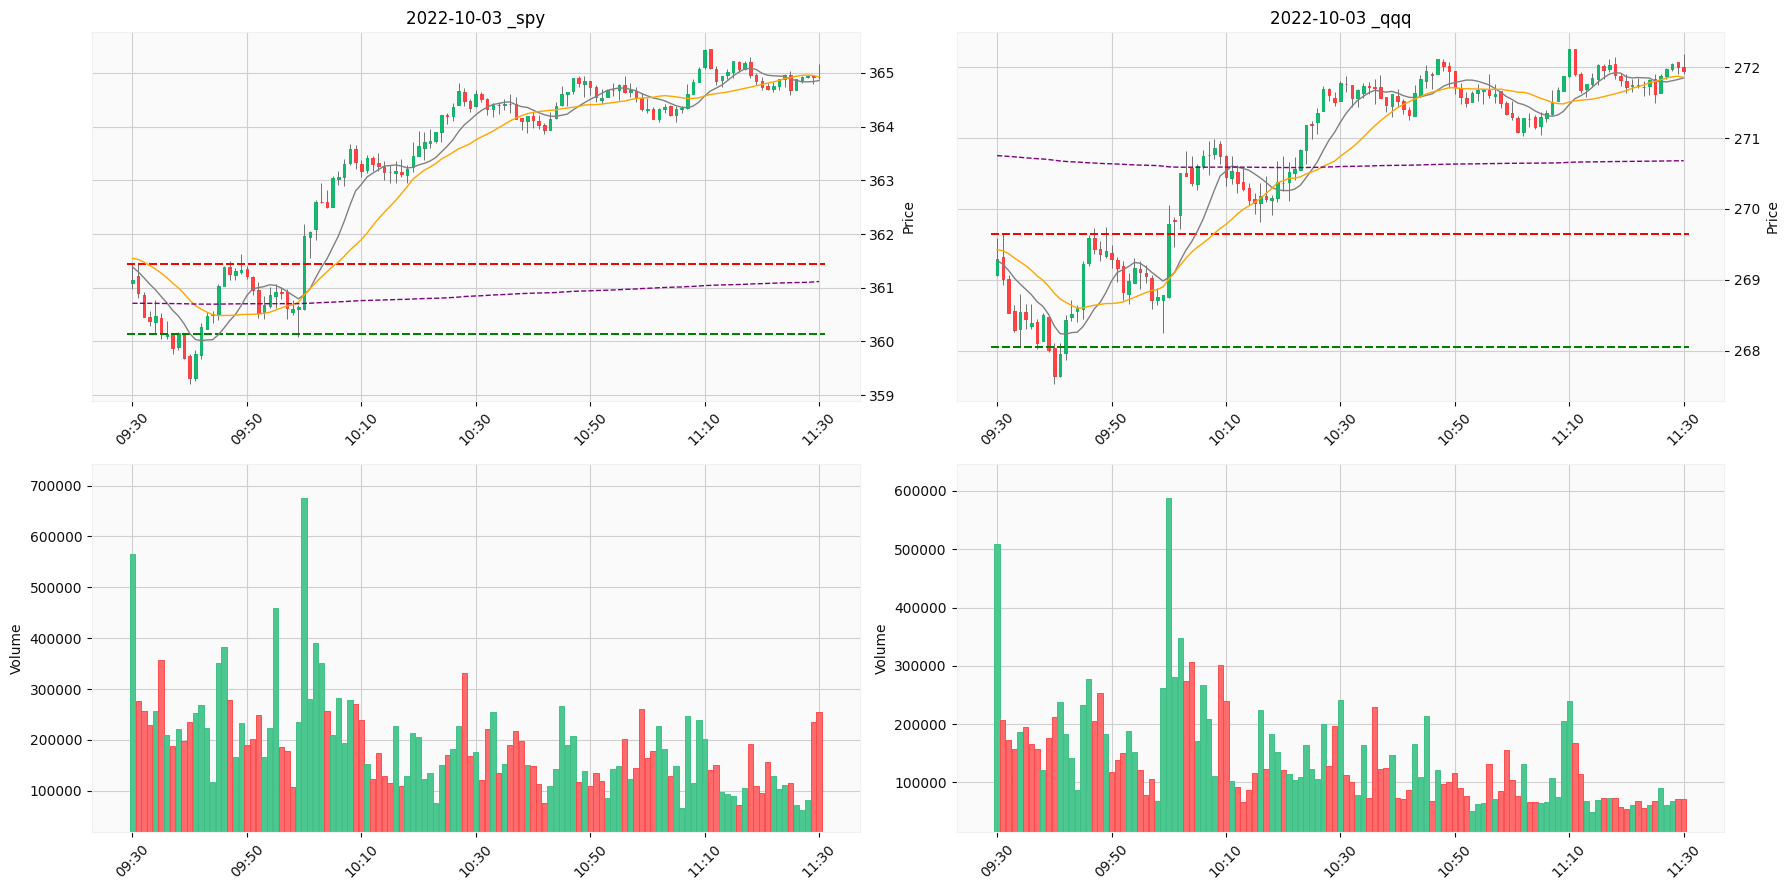

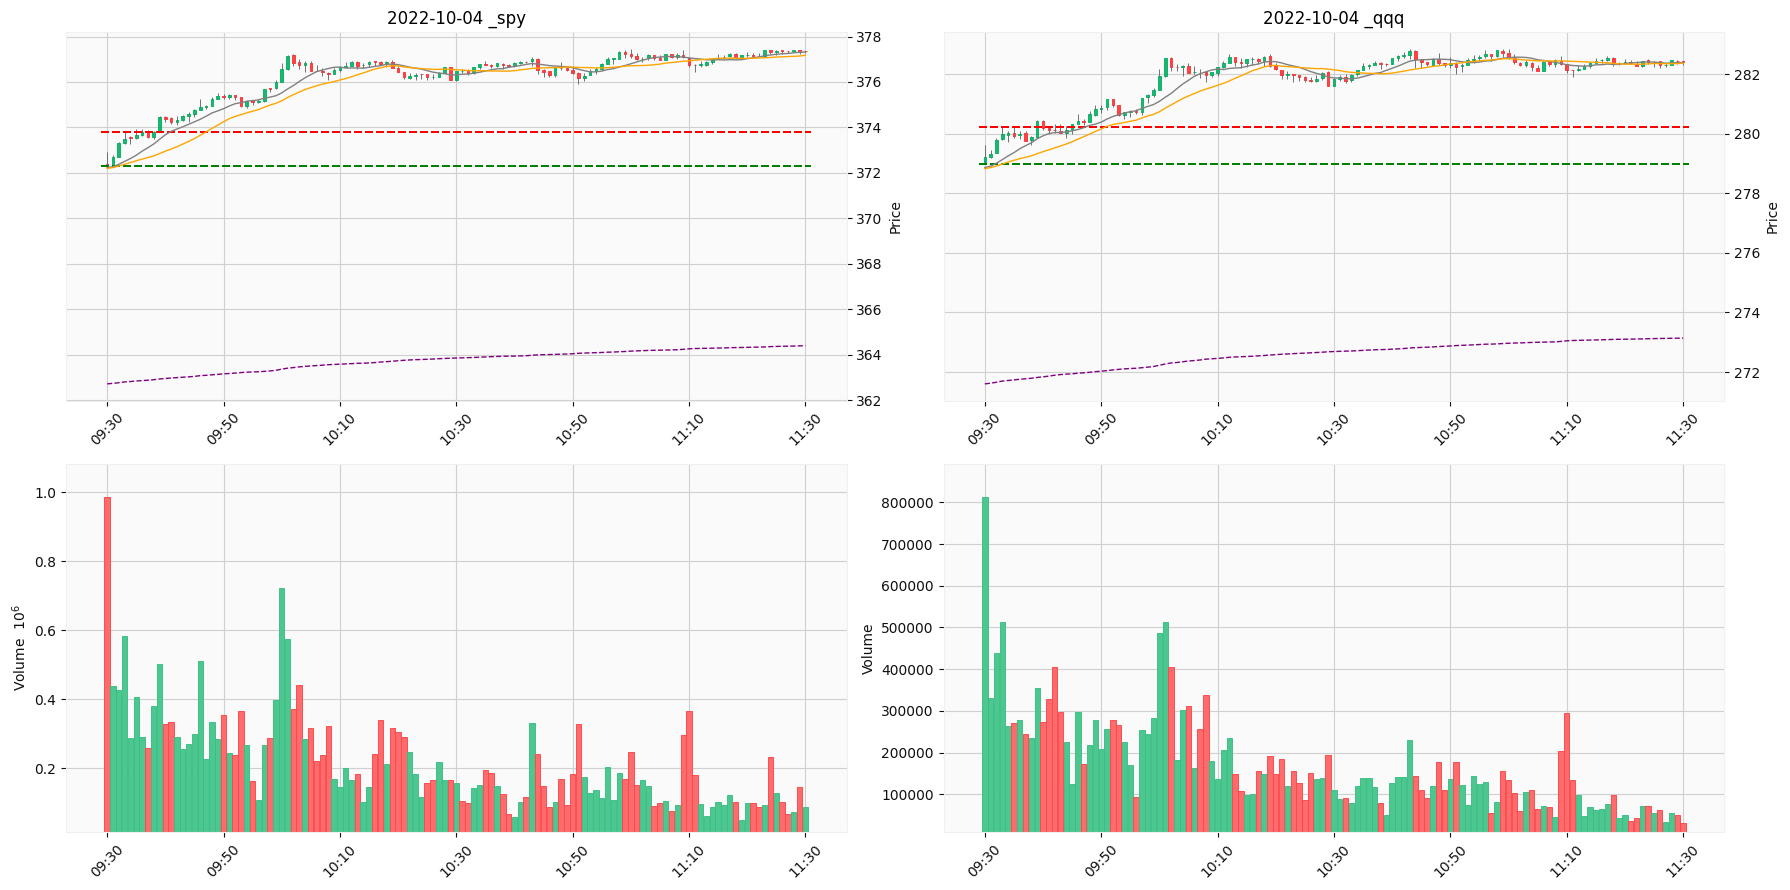

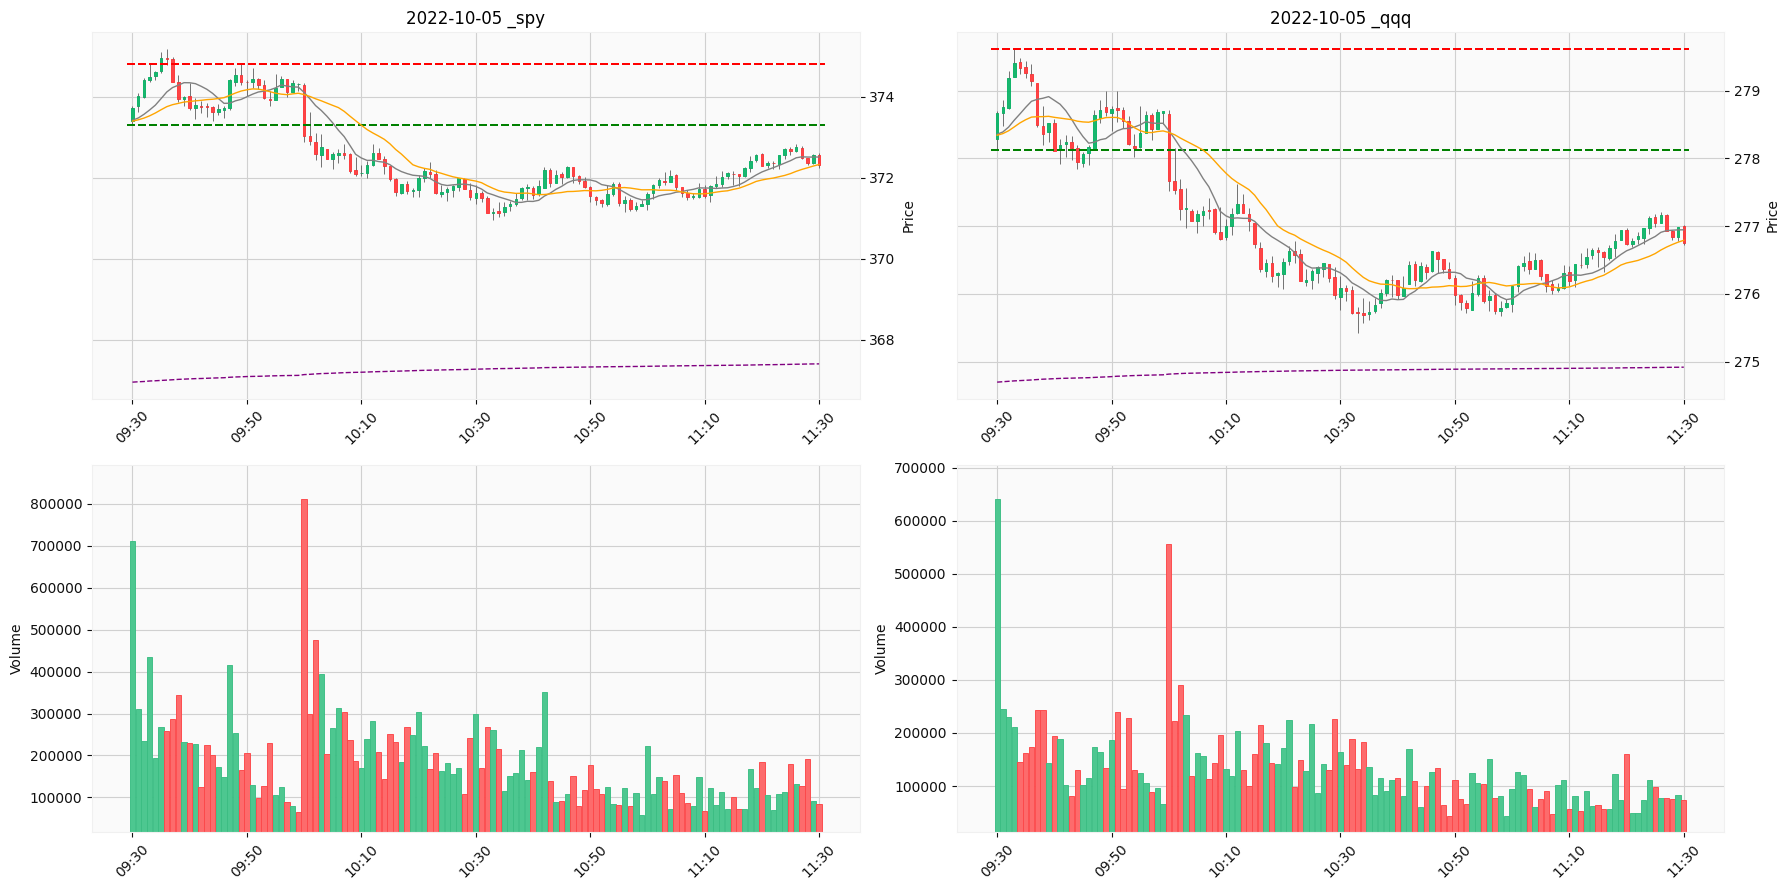

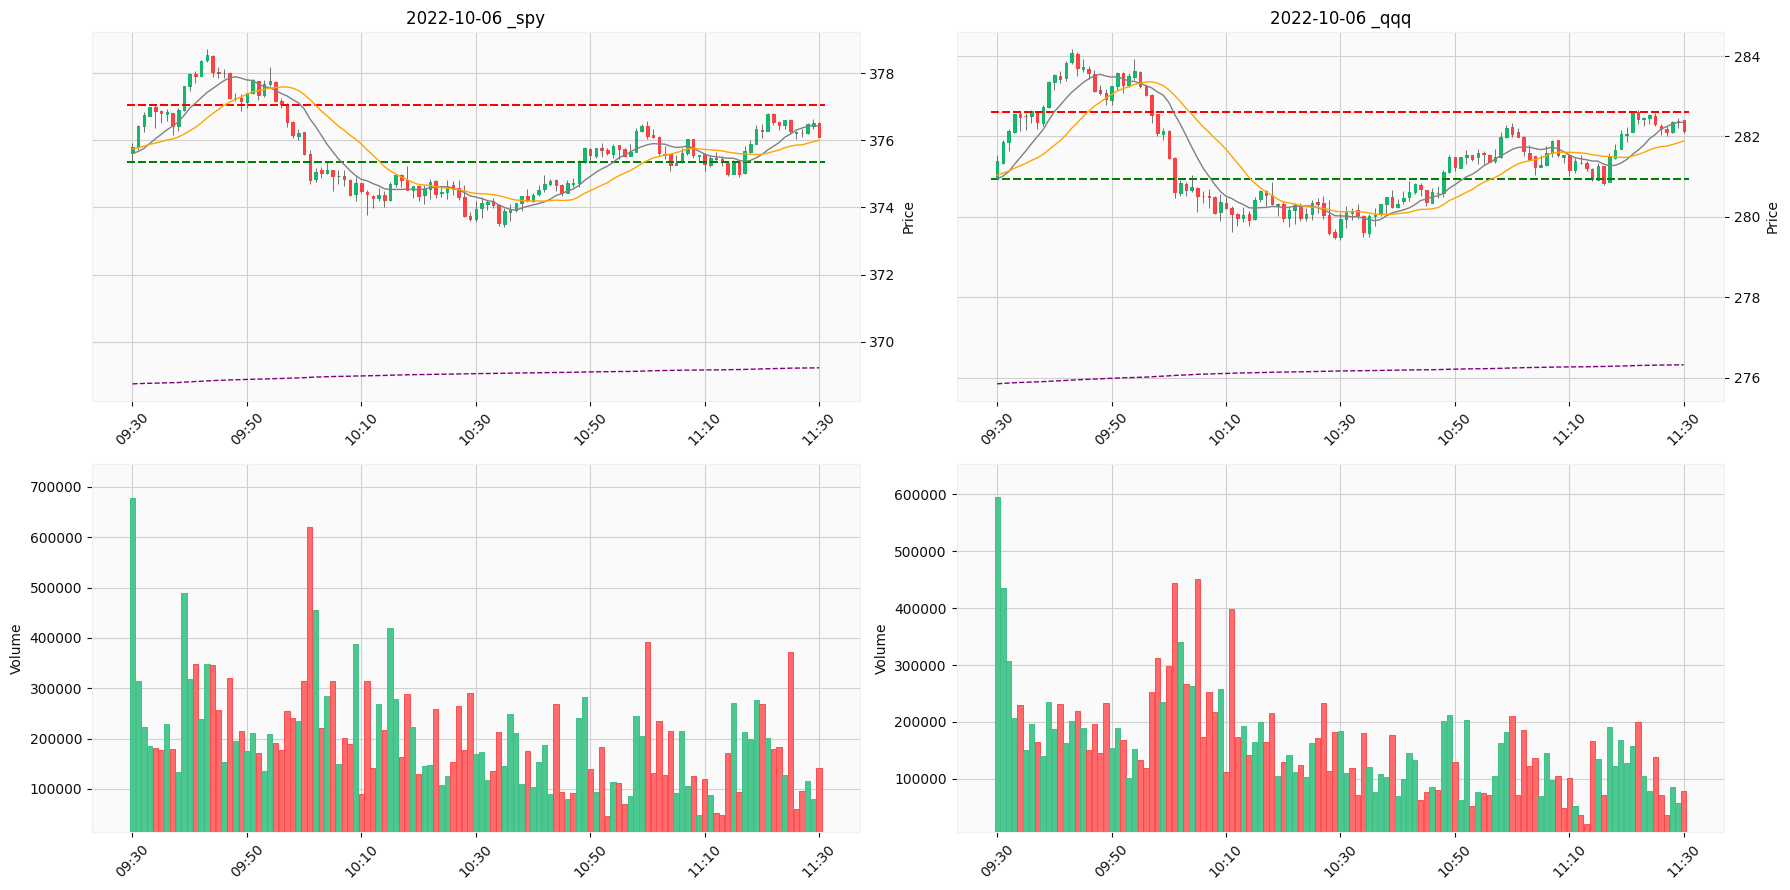

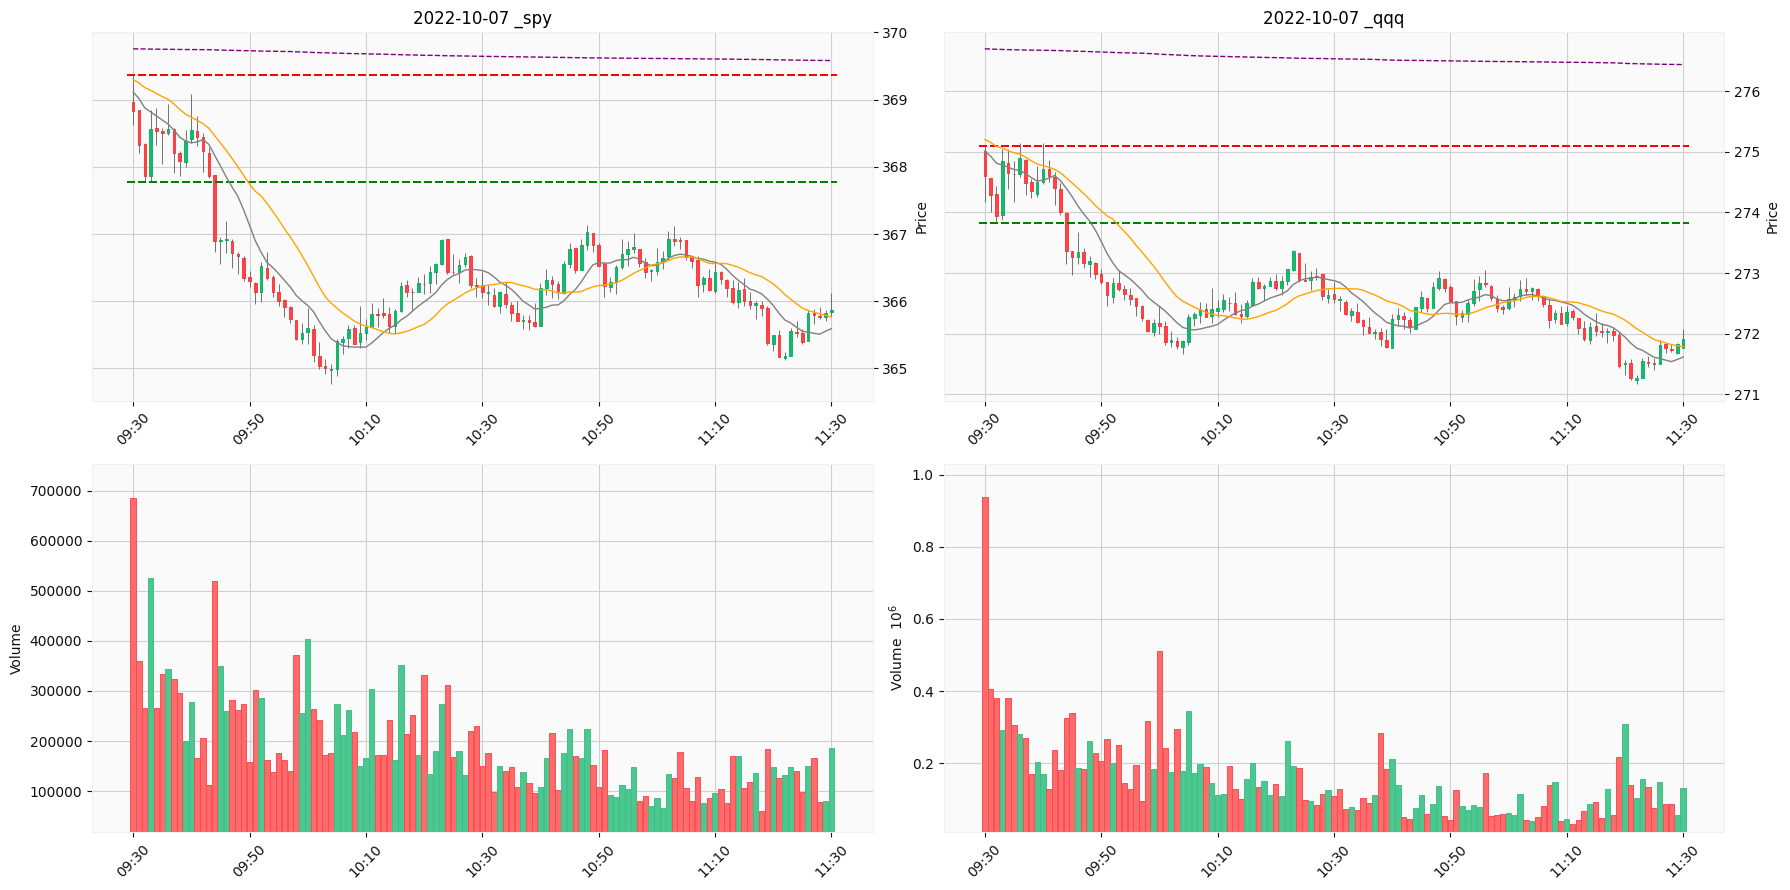

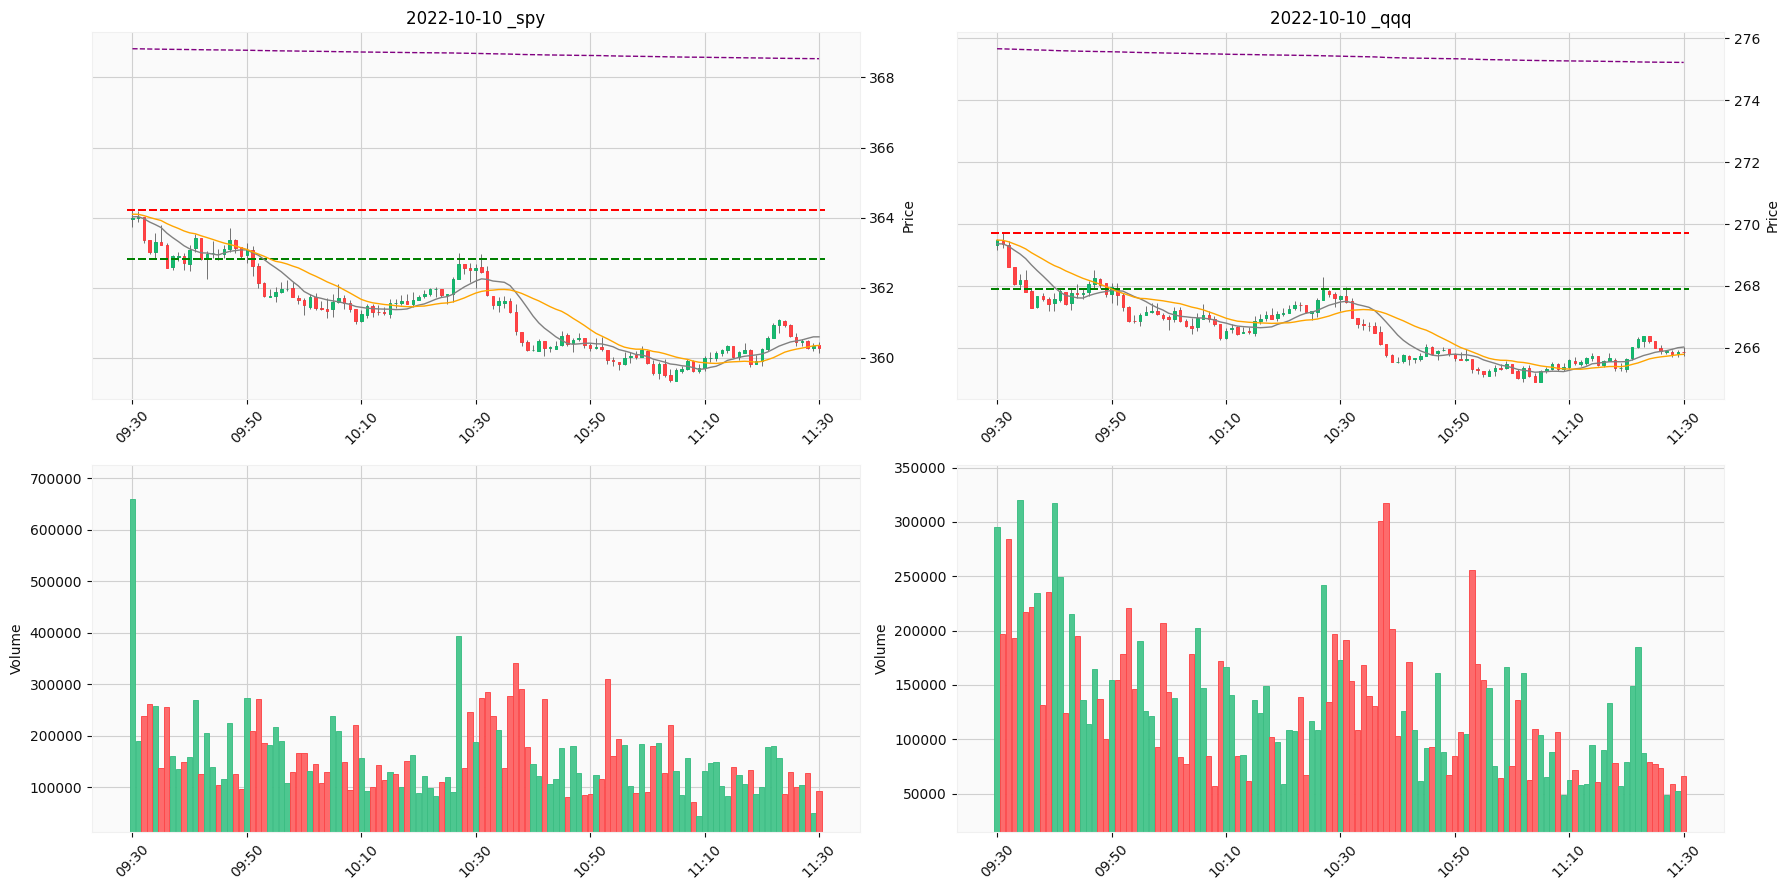

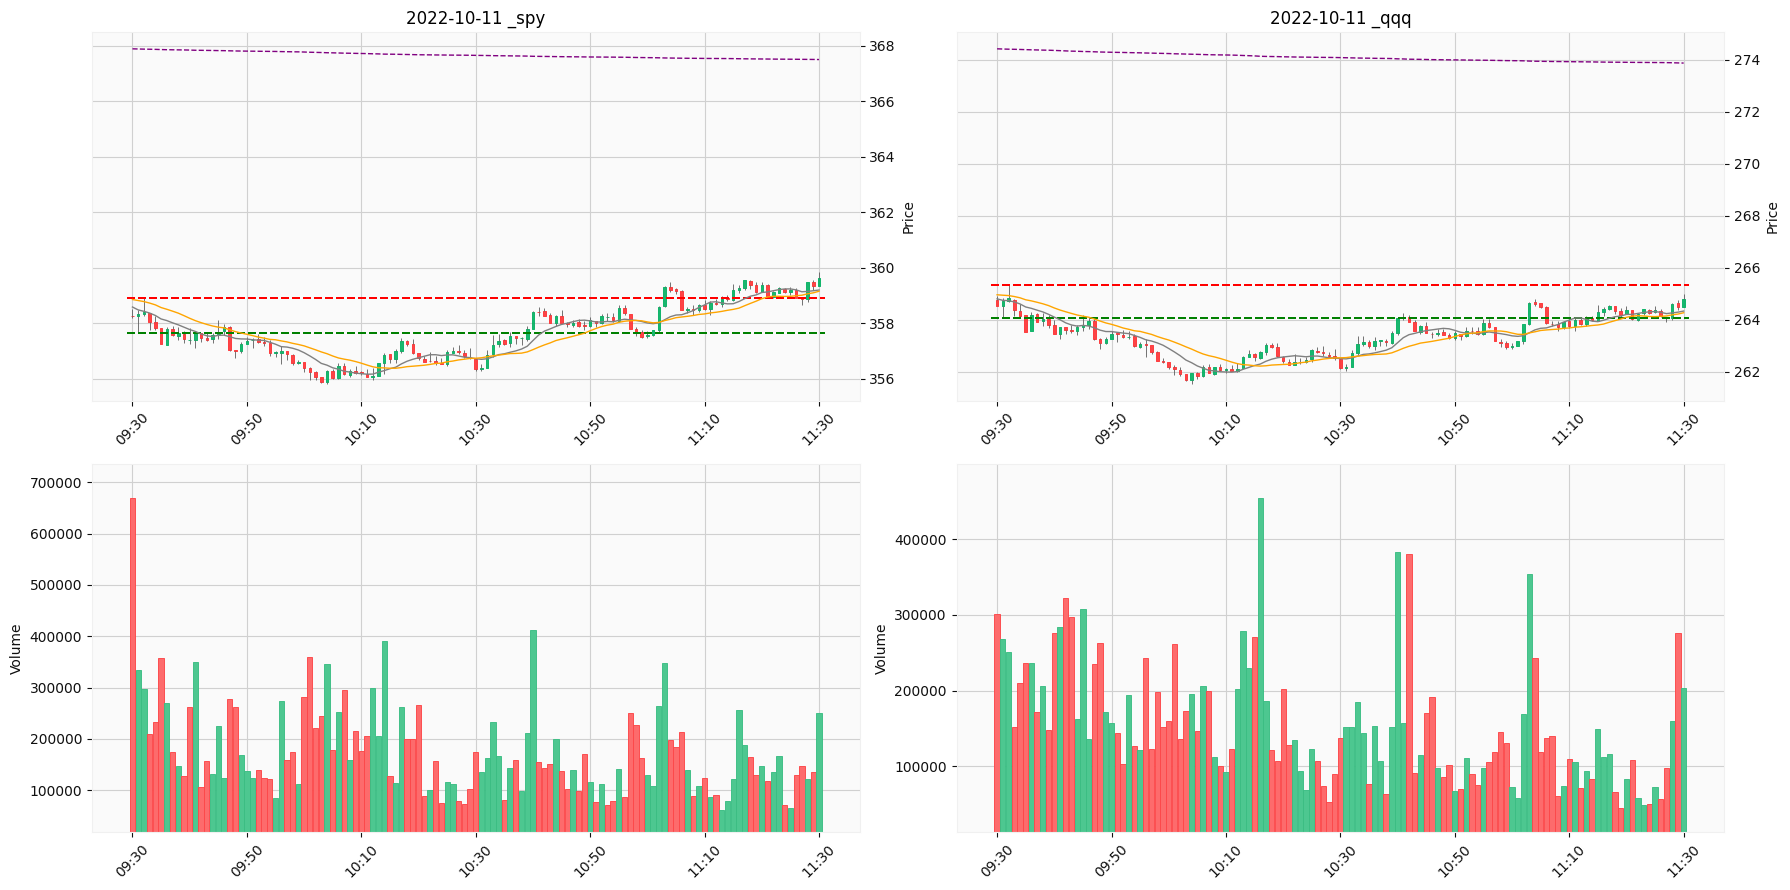

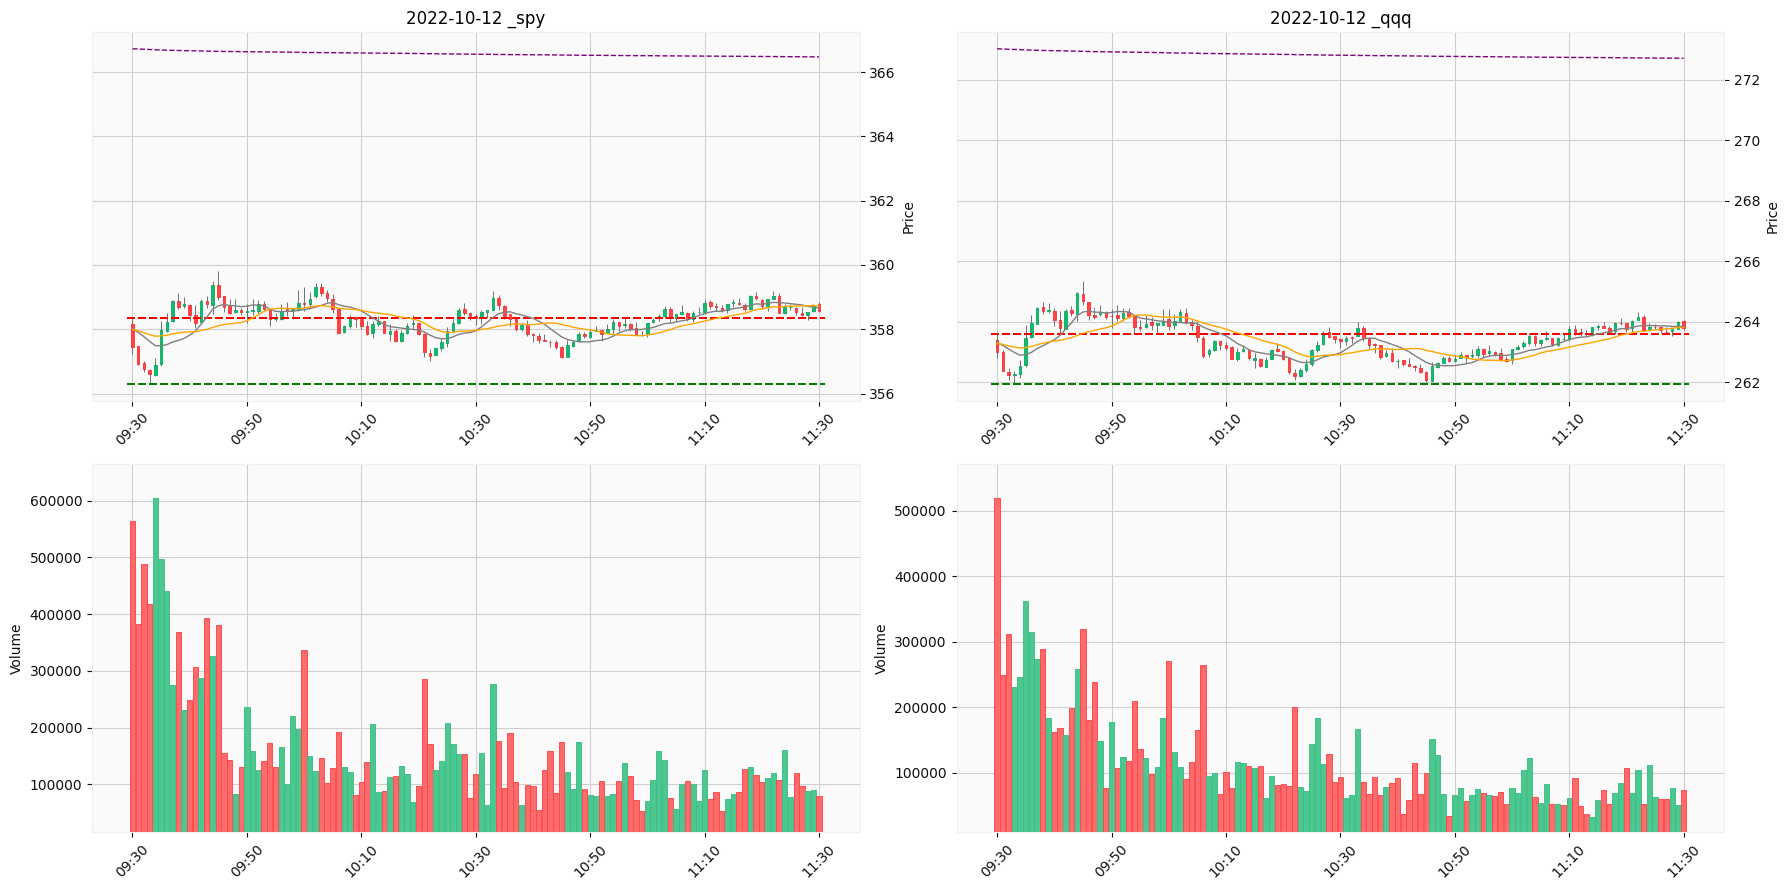

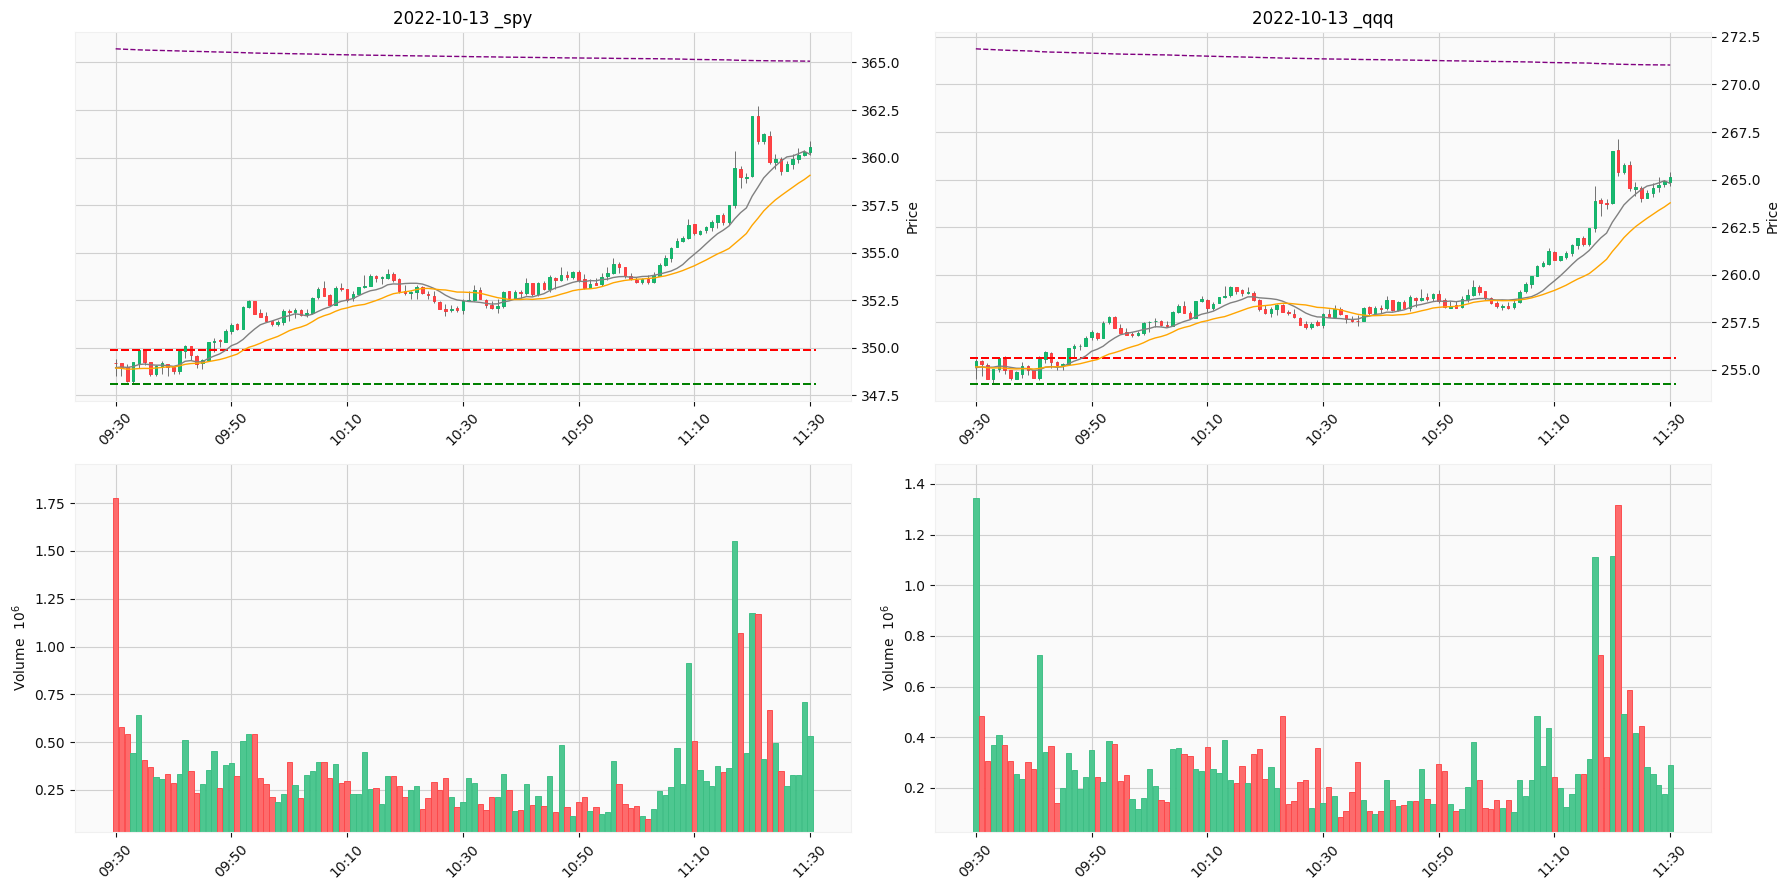

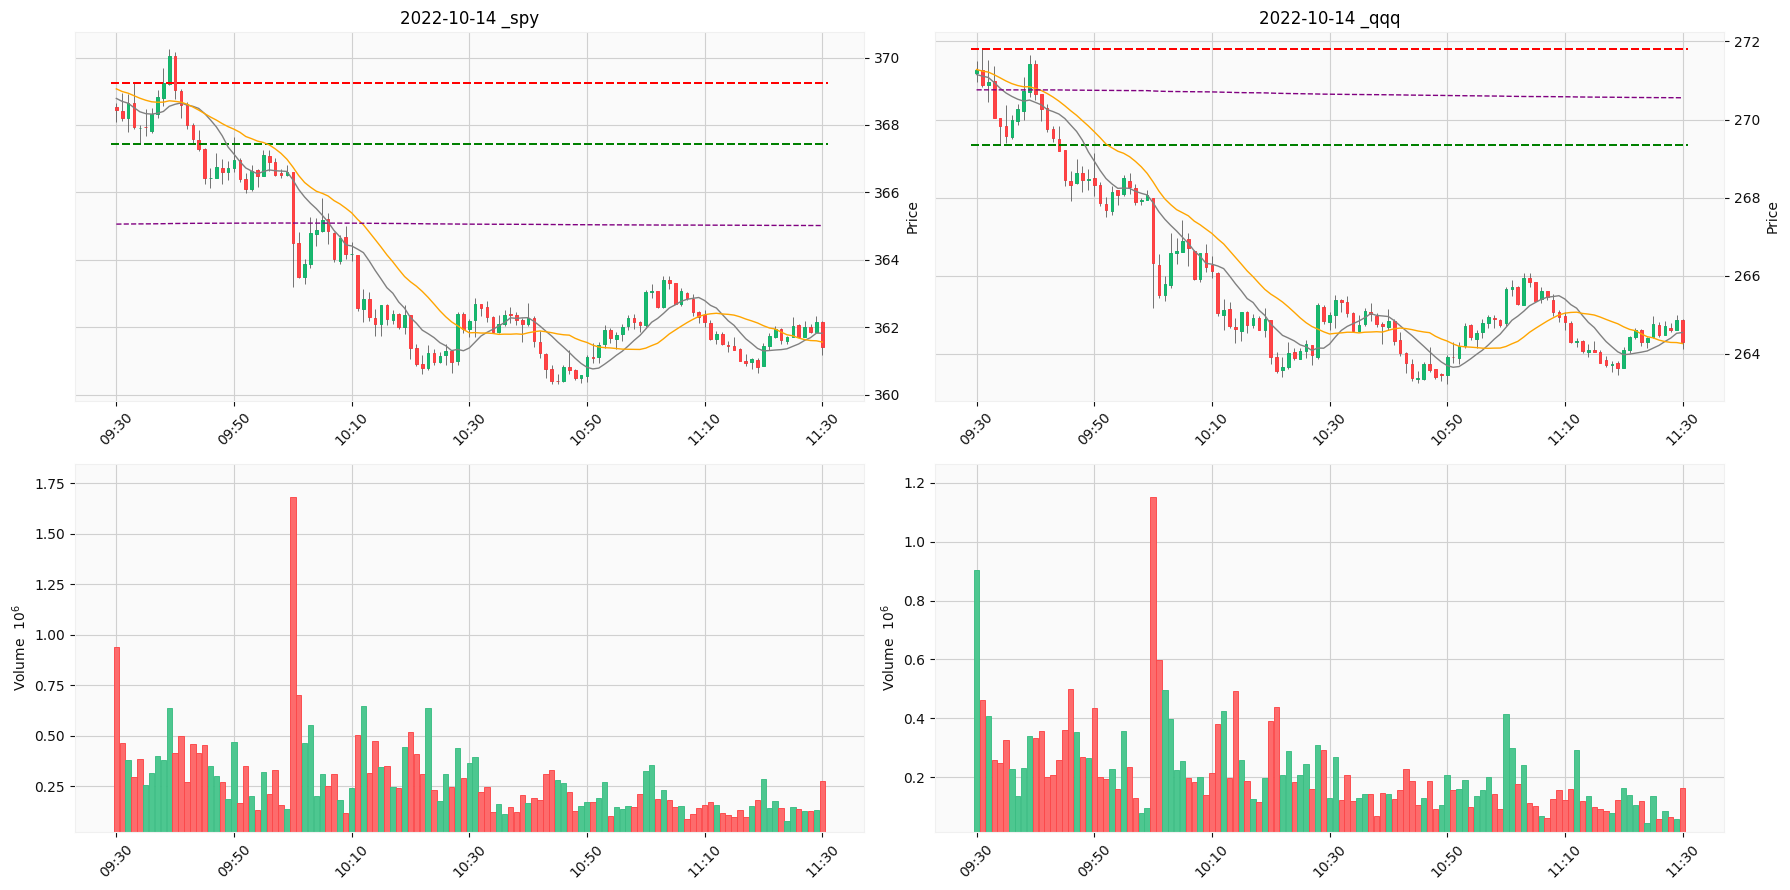

In [44]:
# subset = df.loc['2022-09-30 09:30:00':'2022-09-30 11:30:00']
# Get a list of unique days in the dataset
unique_days = df_qqq.index.normalize().unique()

for i, day in enumerate(unique_days):
    # print(day)
    if i > 10: 
        break
    # print("loc str: ", str(day)[:11] + "09:30:00")
    start_t = str(day)[:11] + "09:30:00"
    end_t = str(day)[:11] + "11:30:00"
    subset_qqq = df_qqq.loc[start_t: end_t]
    subset_spy = df_spy.loc[start_t: end_t]
    plot_side_by_side(subset_qqq, subset_spy, fig_name=str(day)[:11]+".png")

In [45]:
from matplotlib.gridspec import GridSpec


def plot_side_by_side_v2(subset_qqq, subset_spy, save_dir, fig_name):
    # 2. Create figure and add subplots
    fig = mpf.figure(style='yahoo', figsize=(18, 9))
    gs = GridSpec(2, 2, figure=fig, height_ratios=[3, 1], width_ratios=[1, 1])

    # Create axes for each main plot and its corresponding volume plot
    ax1 = fig.add_subplot(gs[0, 0]) # 2 rows, 2 columns, 1st subplot (main plot 1)
    ax2 = fig.add_subplot(gs[0, 1]) # 2 rows, 2 columns, 2nd subplot (main plot 2)
    volume_ax1 = fig.add_subplot(gs[1, 0], sharex=ax1) # 2 rows, 2 columns, 3rd subplot (volume plot 1)
    volume_ax2 = fig.add_subplot(gs[1, 1], sharex=ax2) # 2 rows, 2 columns, 4th subplot (volume plot 2)

    # 3. Create addplots for each DataFrame, specifying the axis
    def get_addplots(subset, ax):
        addplots = [
            mpf.make_addplot(subset['MA10'], ax=ax, color='grey', width=1.0, linestyle='solid'),
            mpf.make_addplot(subset['MA20'], ax=ax, color='orange', width=1.0, linestyle='solid'),
            mpf.make_addplot(subset['VWAP'], ax=ax, color='purple', width=1.0, linestyle='dashed')
        ]
        return addplots

    addplots1 = get_addplots(subset_spy, ax=ax1)
    addplots2 = get_addplots(subset_qqq, ax=ax2)

    # 4. Define hlines for each plot
    def get_hlines(subset):
        open_range = subset.iloc[:5]
        open_range_high = open_range['high'].max()
        open_range_low = open_range['low'].min()
        hlines = dict(hlines=[open_range_high, open_range_low], colors=['red', 'green'], linestyle='dashed')
        return hlines

    hlines1 = get_hlines(subset_spy)
    hlines2 = get_hlines(subset_qqq)

    # 5. Plot each DataFrame on its own set of axes
    mpf.plot(subset_spy, type='candle', ax=ax1, volume=volume_ax1, addplot=addplots1, hlines=hlines1, axtitle=fig_name[:-4] + '_spy')
    mpf.plot(subset_qqq, type='candle', ax=ax2, volume=volume_ax2, addplot=addplots2, hlines=hlines2, axtitle=fig_name[:-4] + '_qqq')

    # Adjust layout for better display
    fig.tight_layout()
    # plt.show()
    fig.savefig(os.path.join(save_dir, fig_name), dpi=100) # Use plt.savefig(..) instead if not using external axes mode



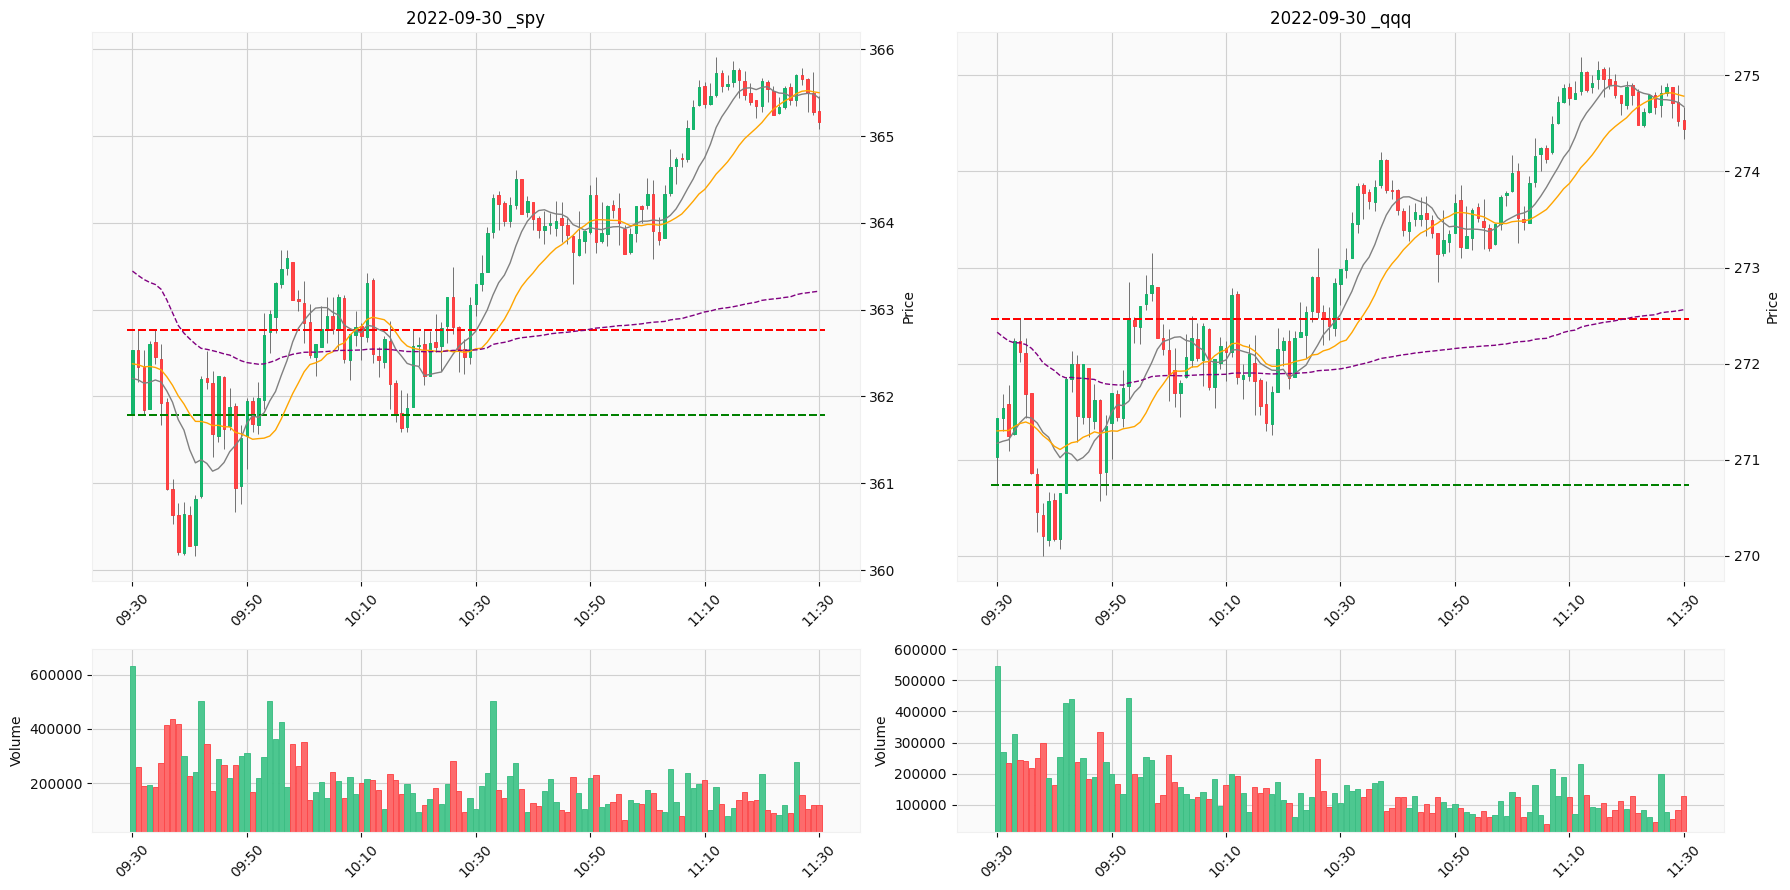

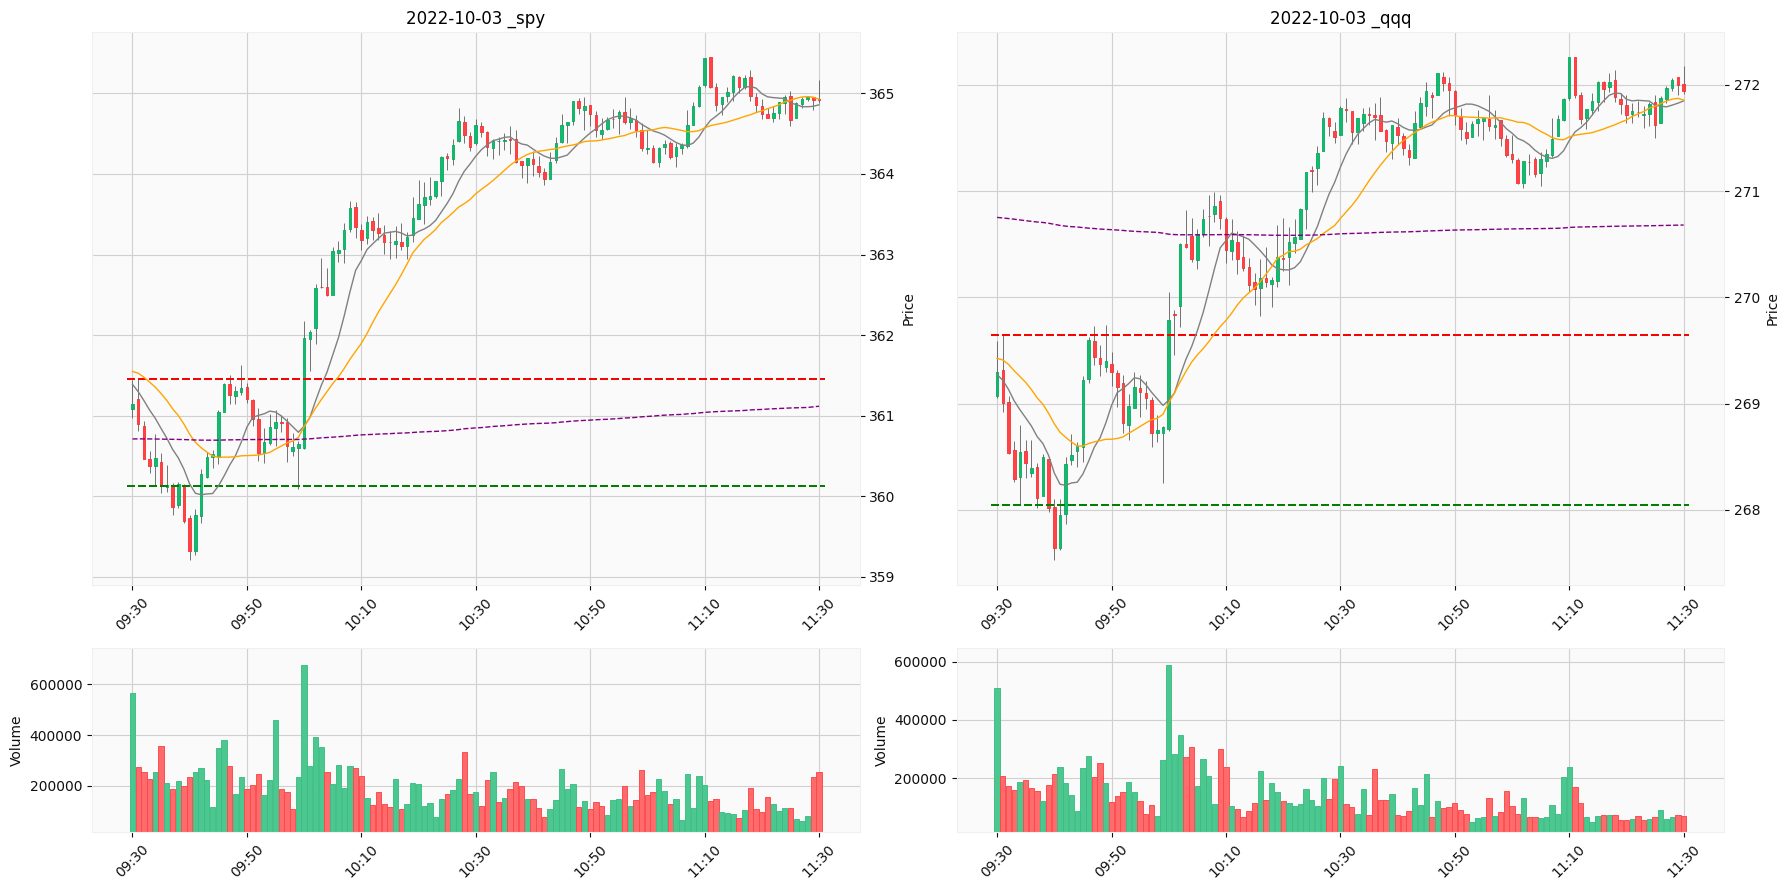

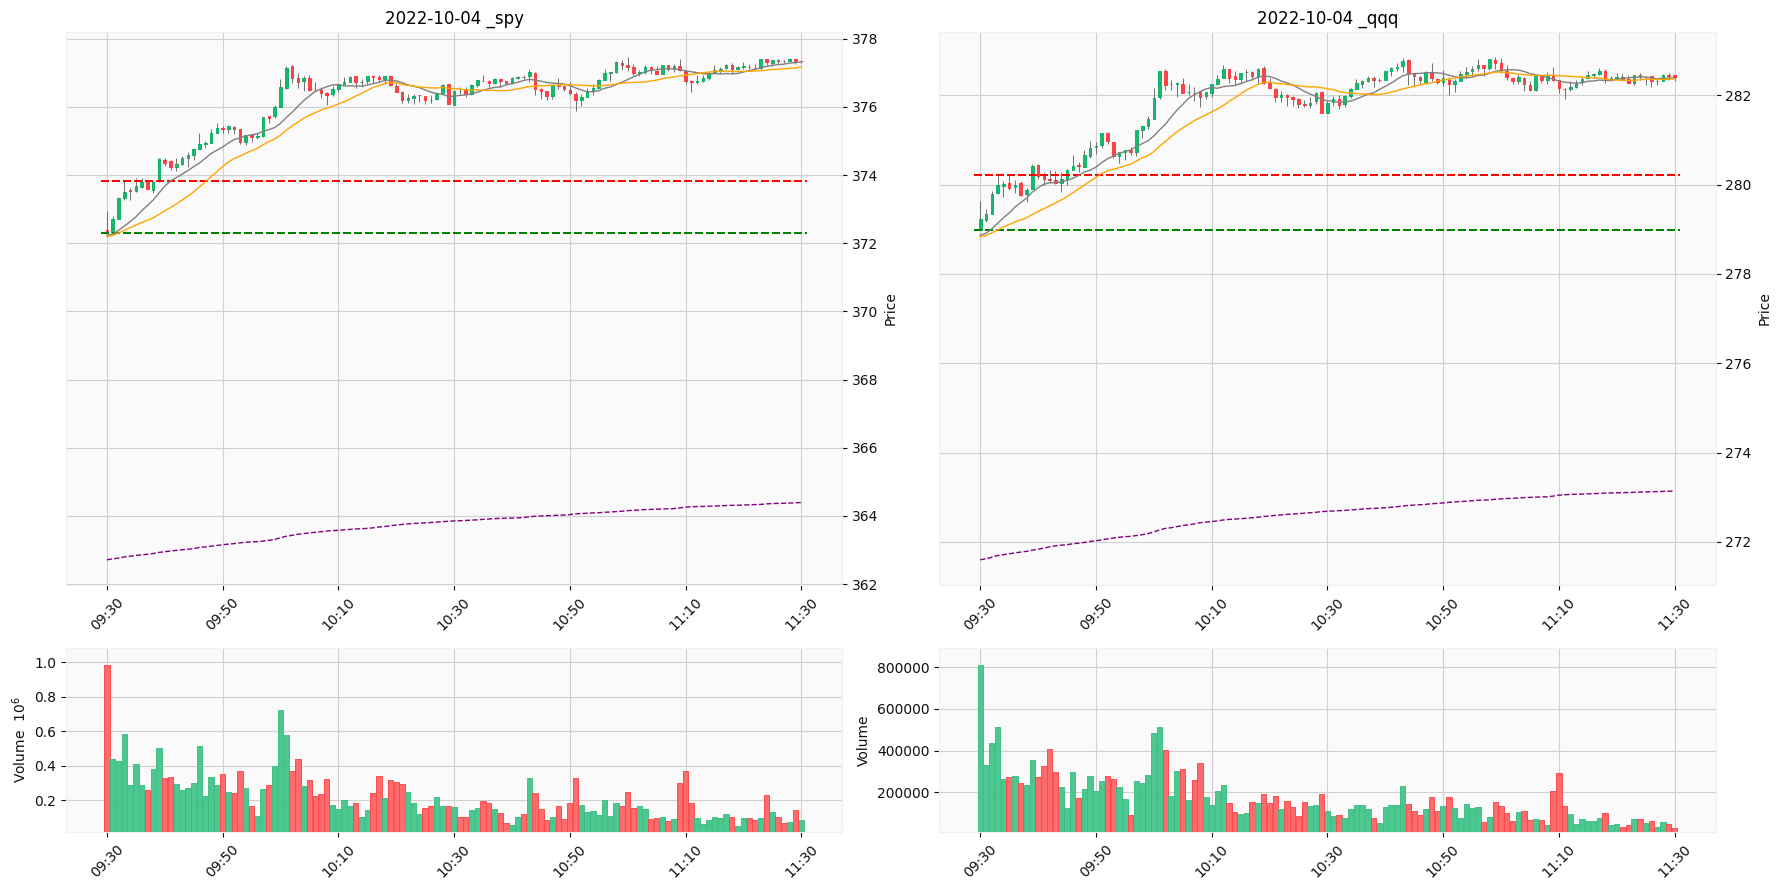

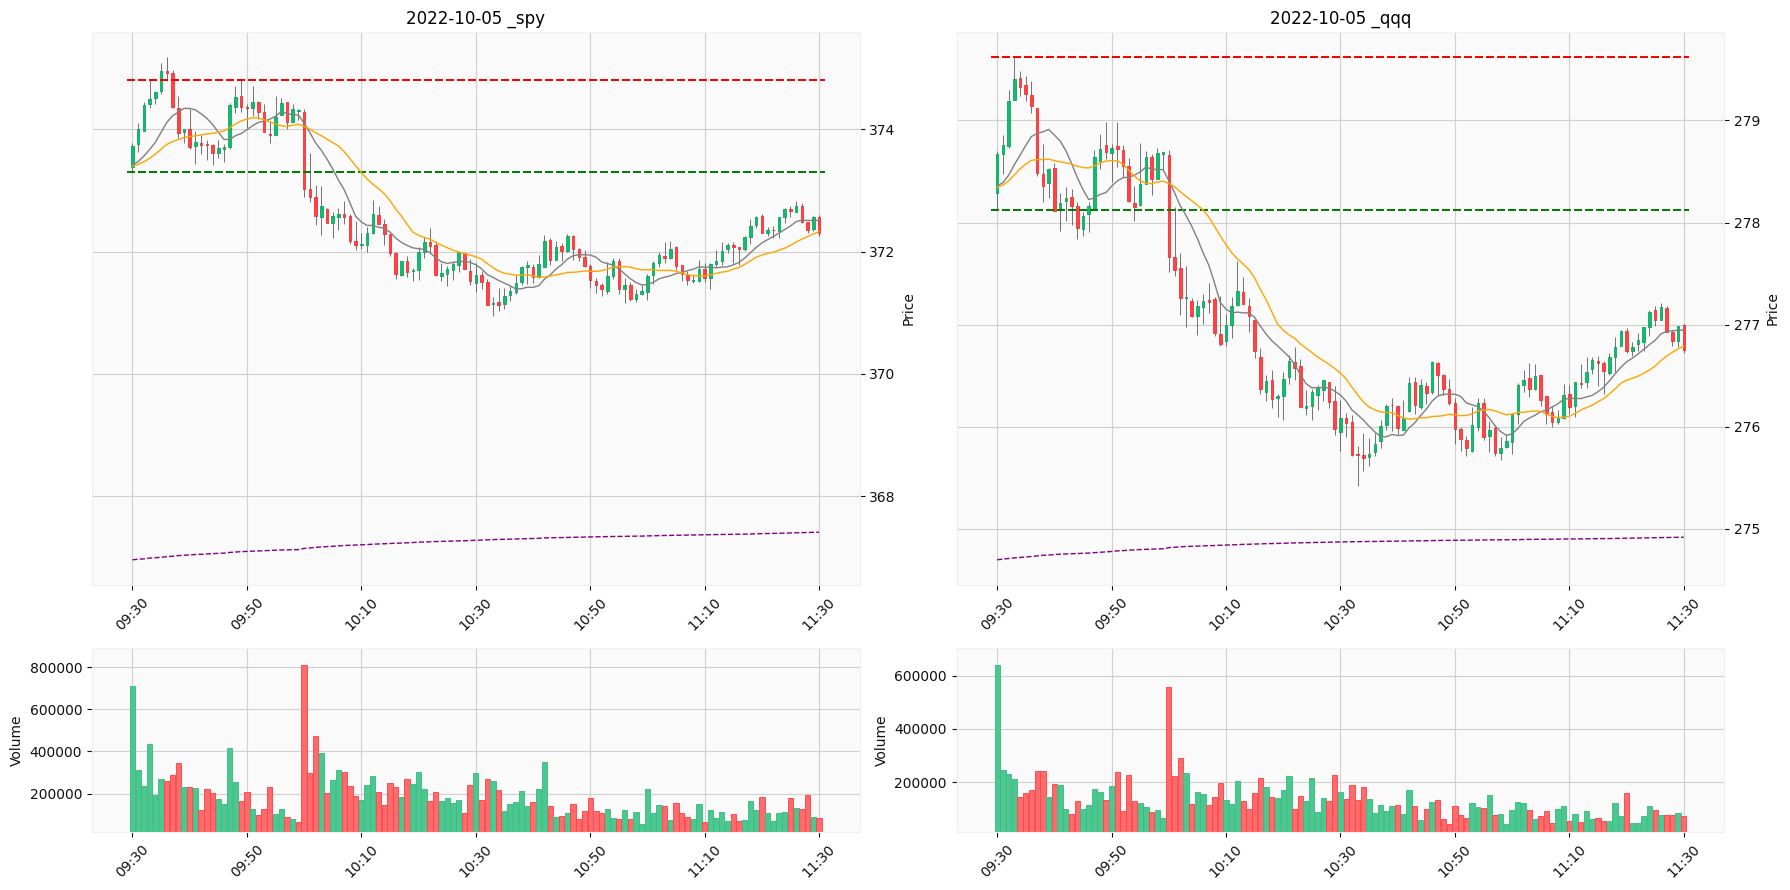

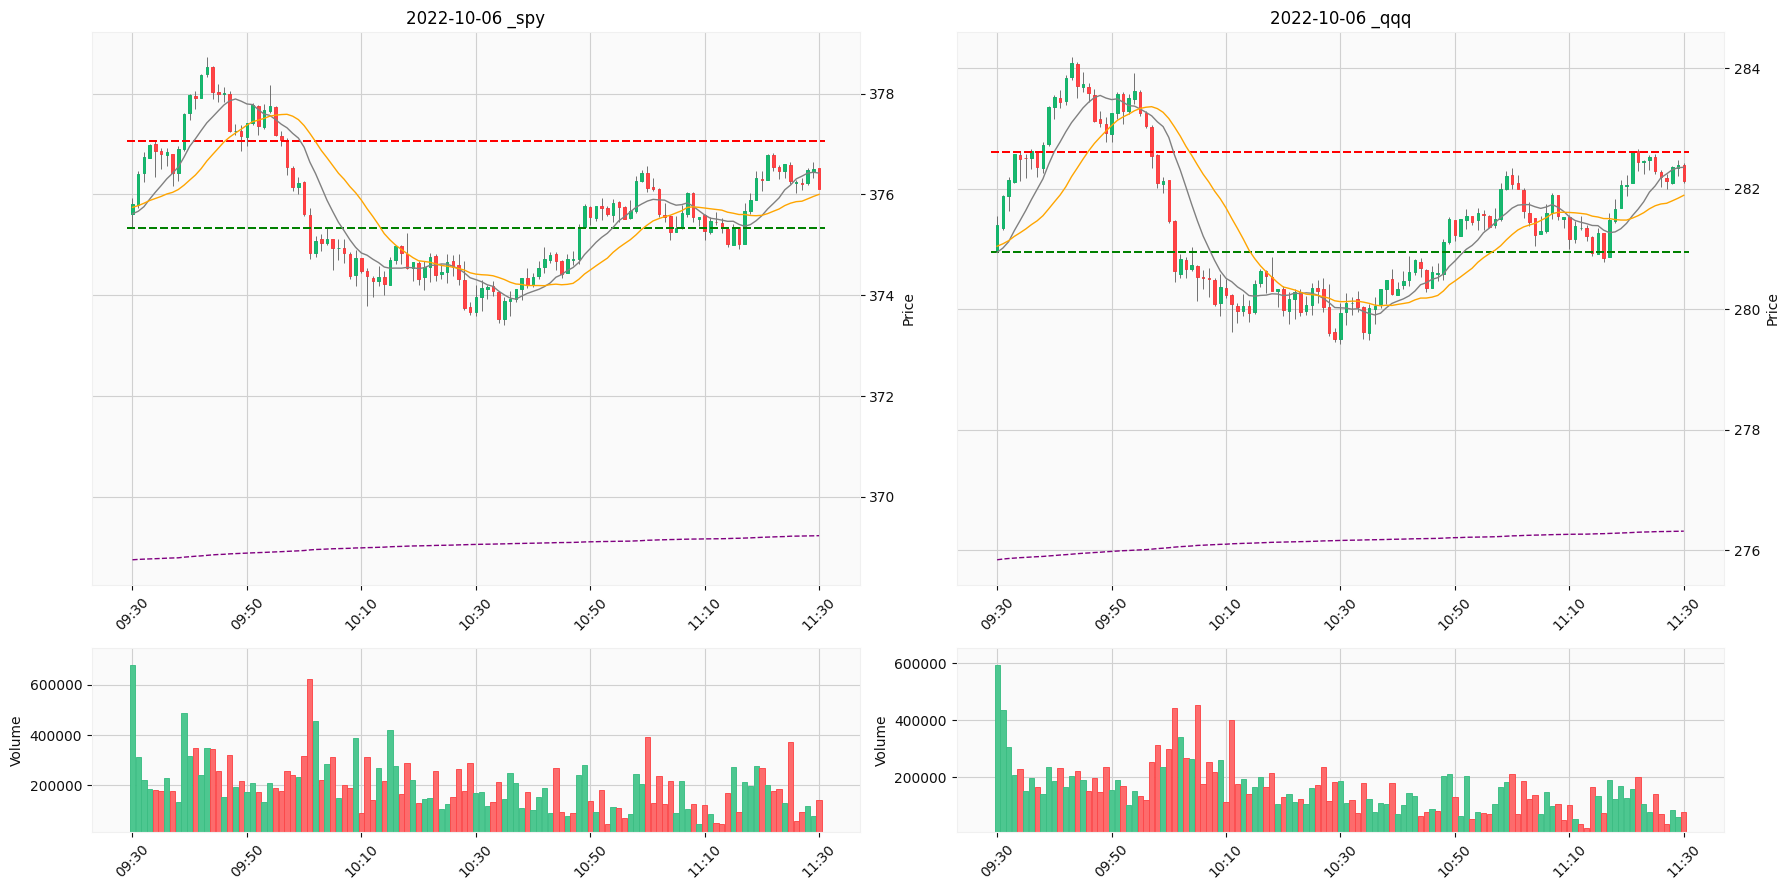

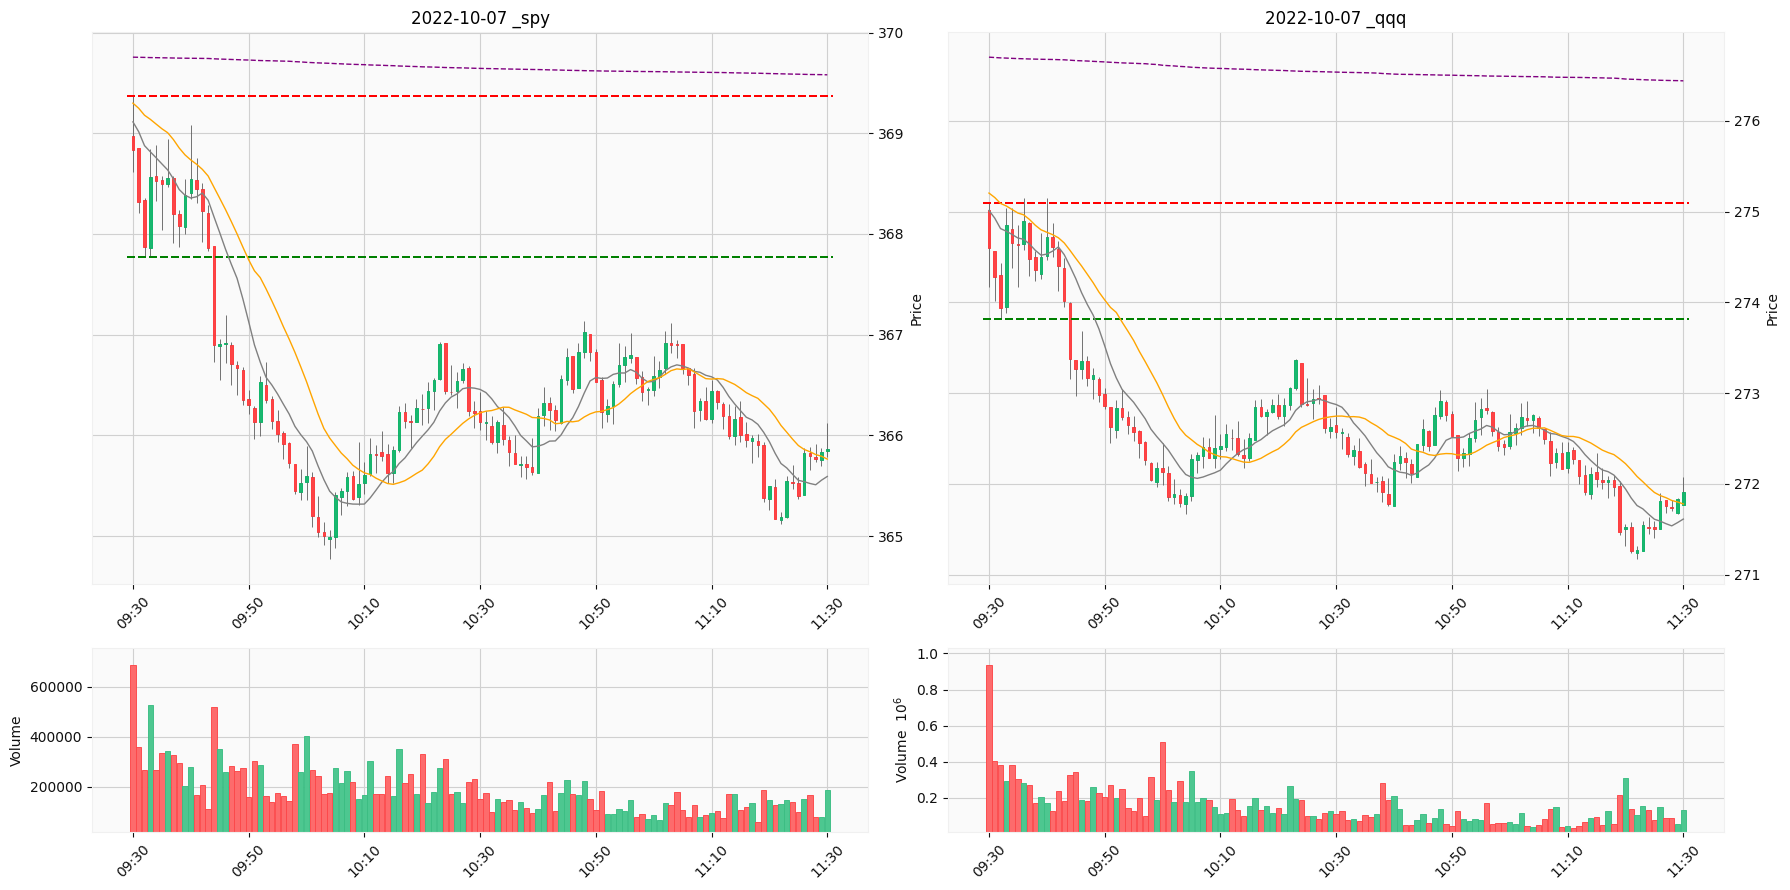

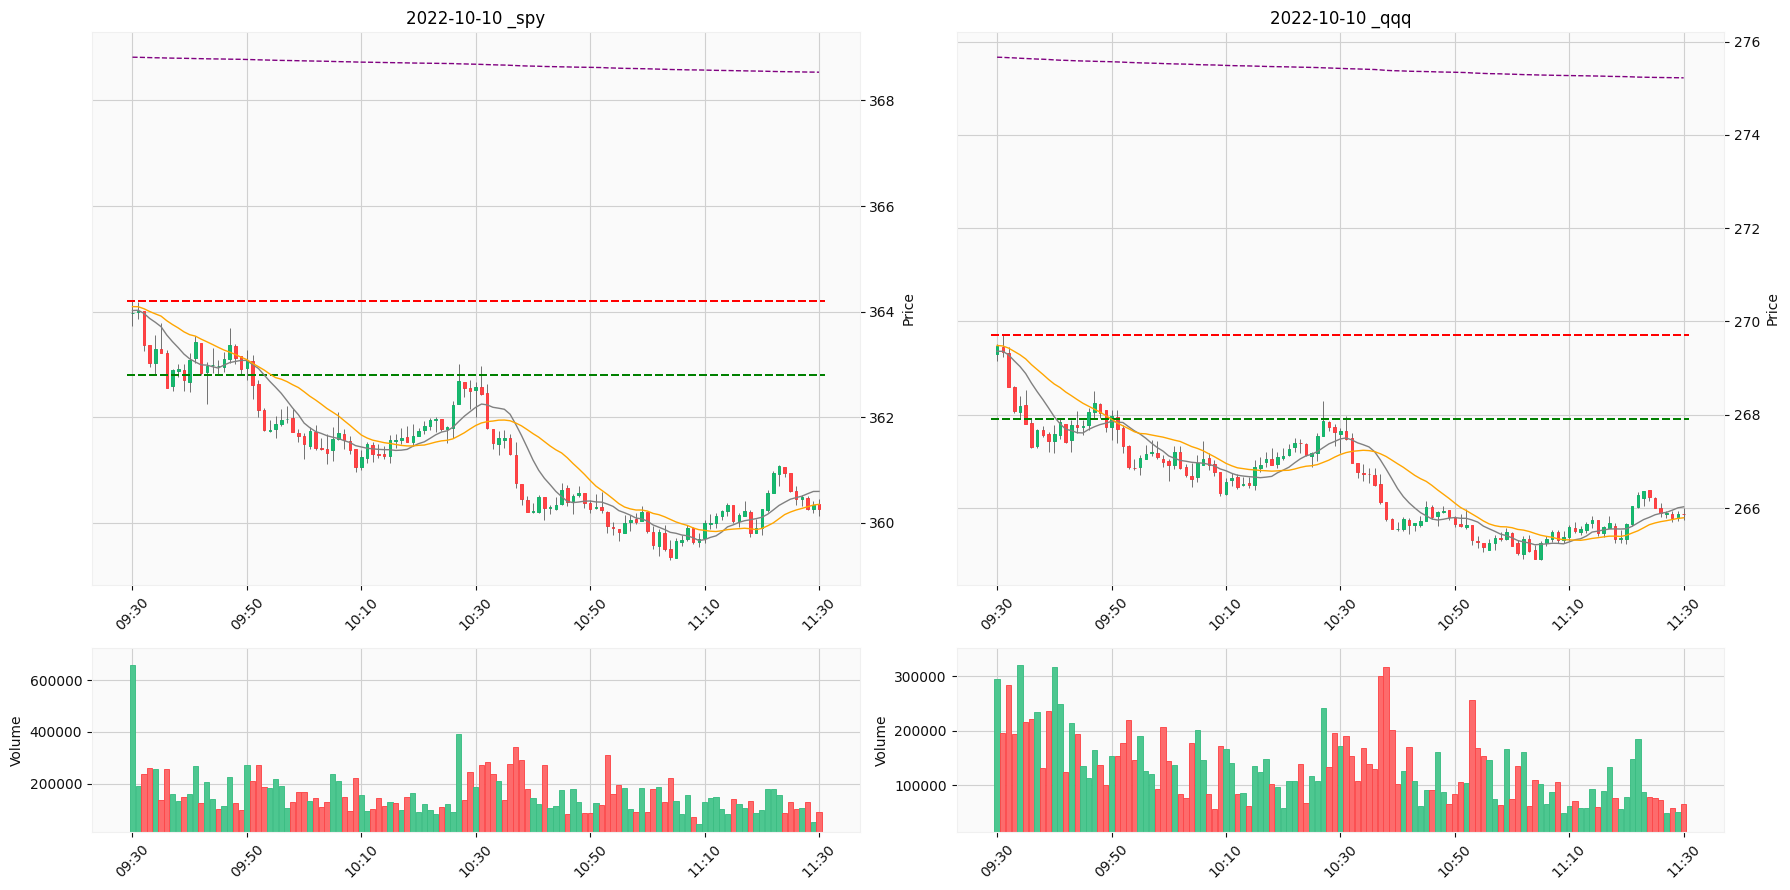

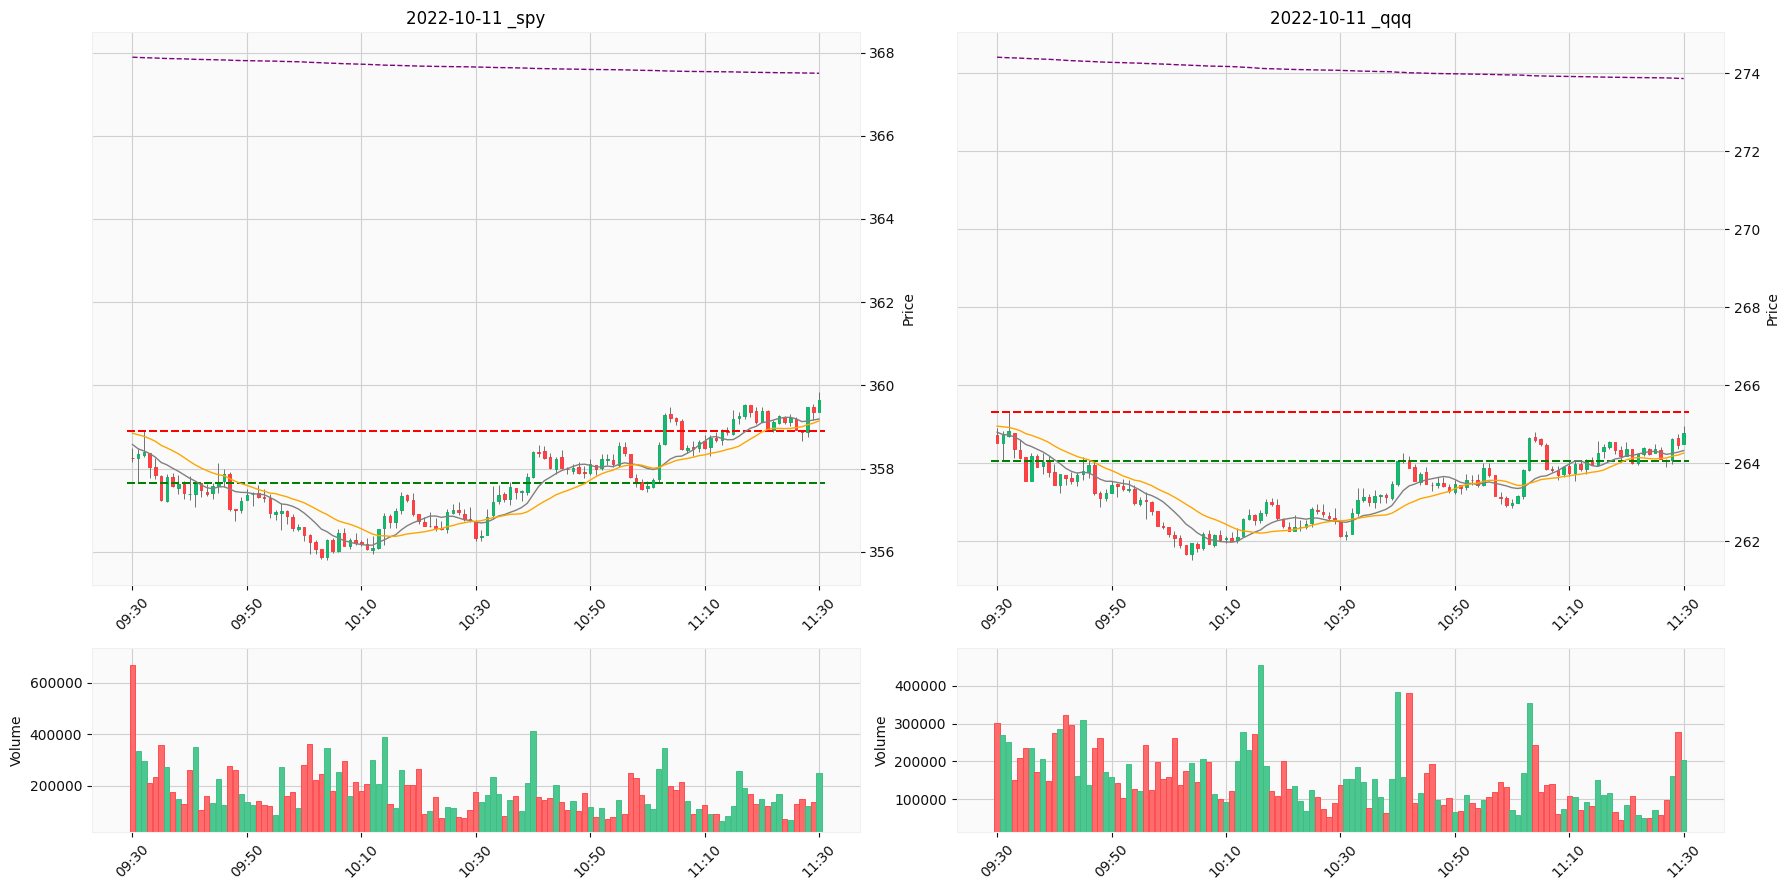

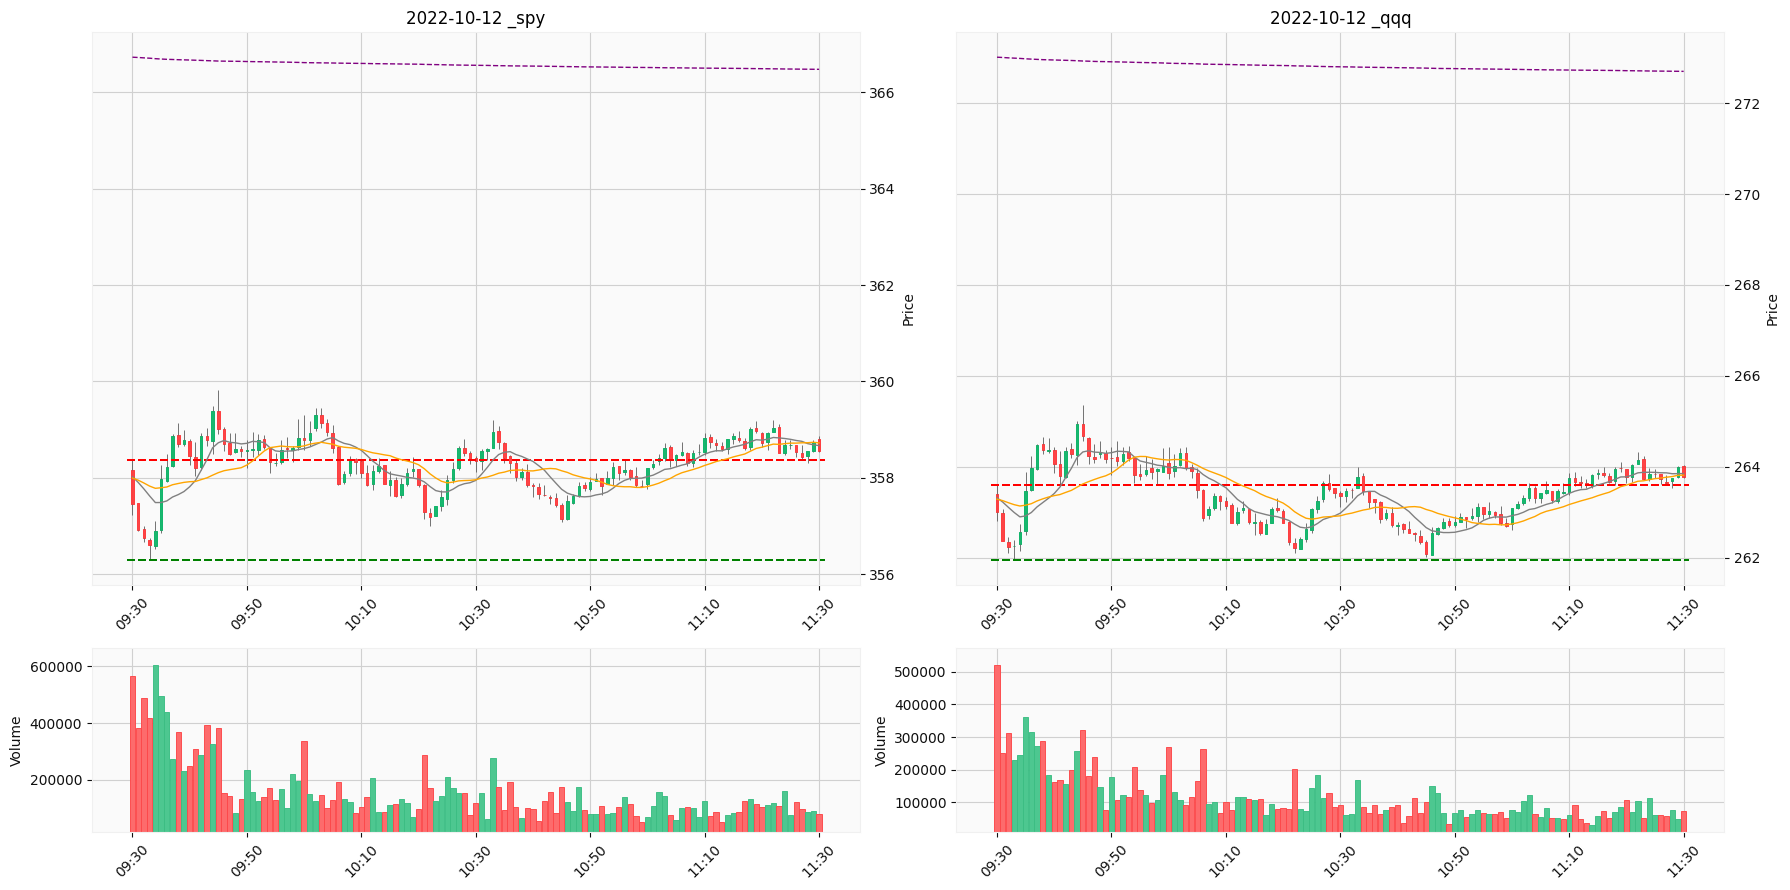

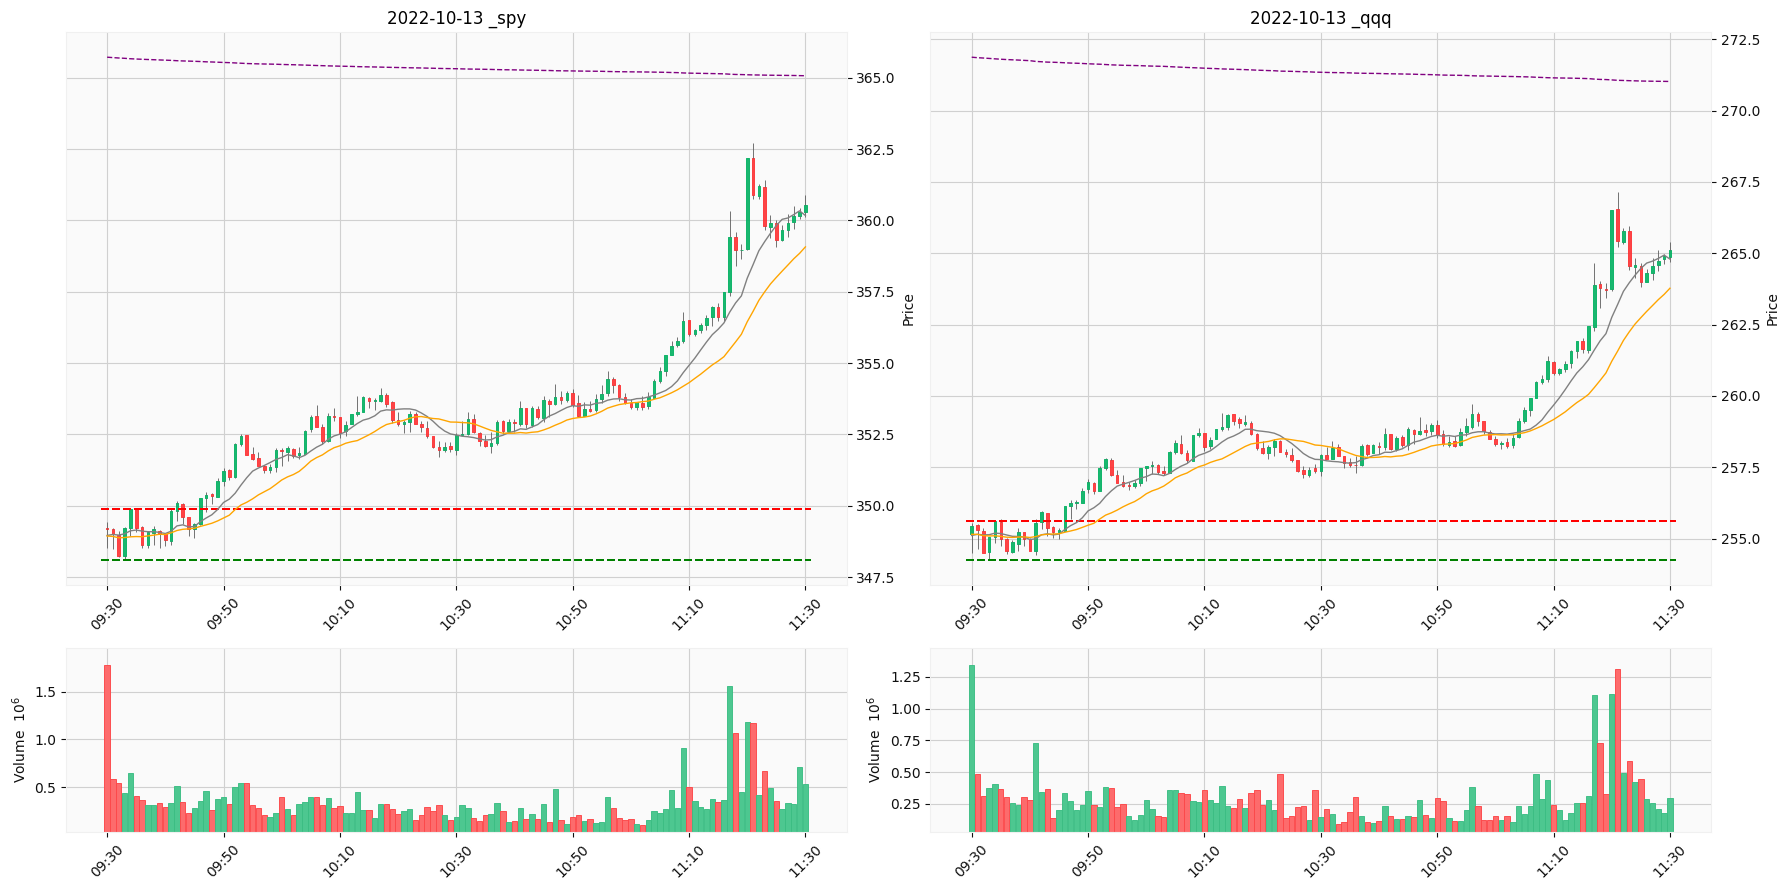

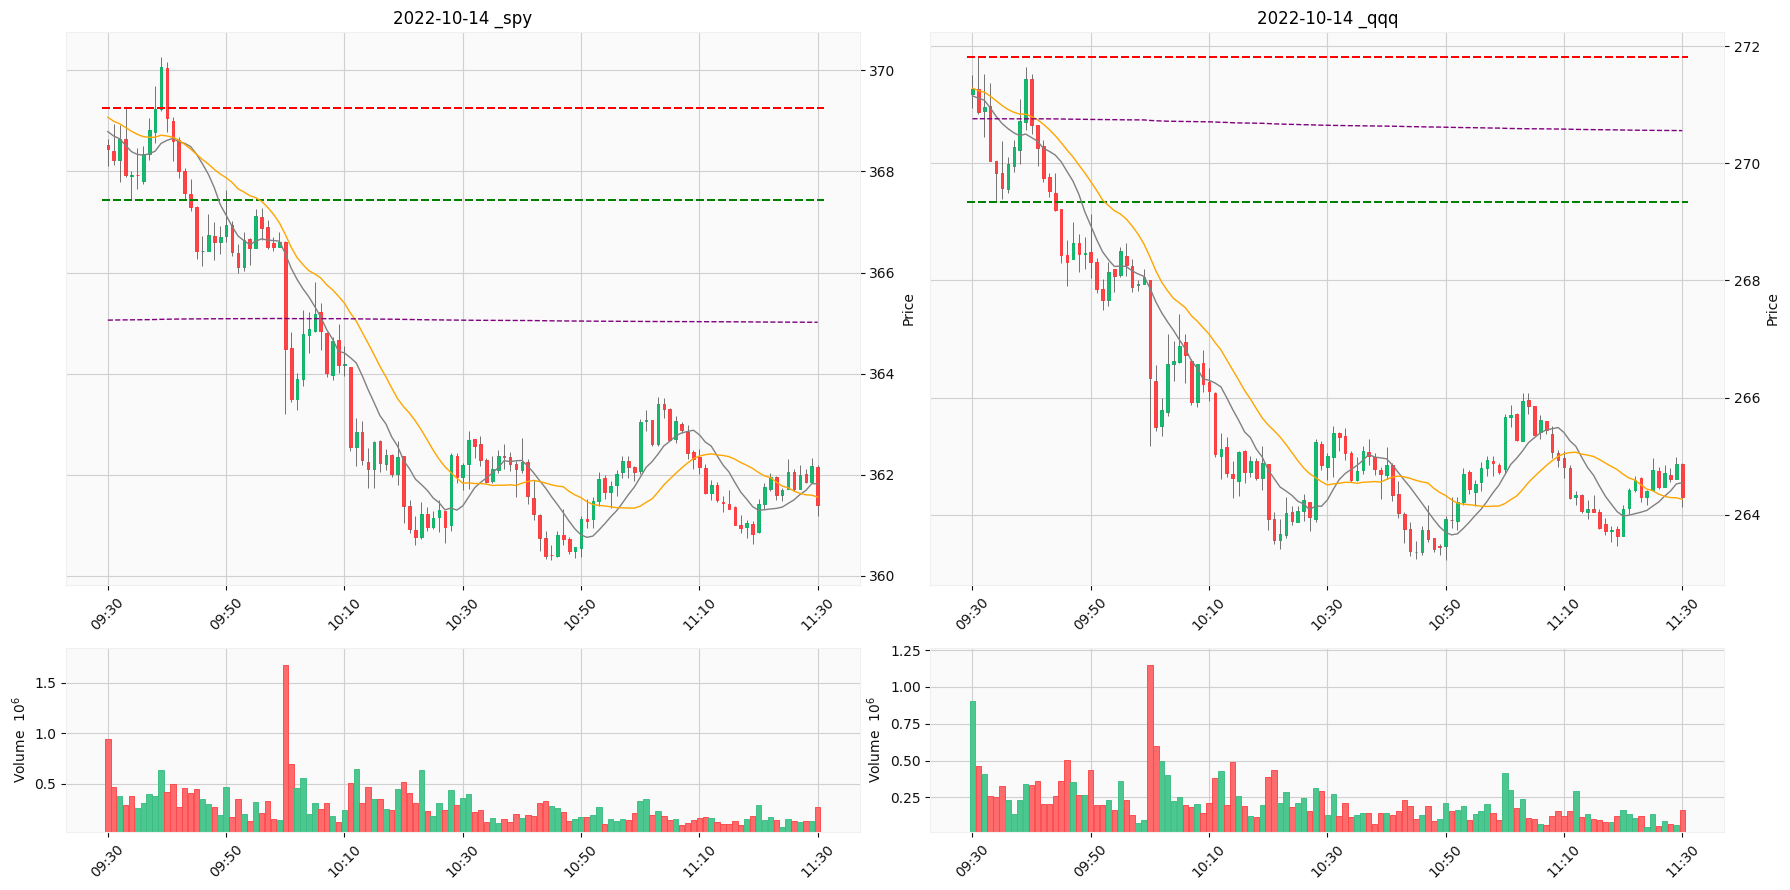

In [46]:
unique_days = df_qqq.index.normalize().unique()

for i, day in enumerate(unique_days):
    # print(day)
    if i > 10: 
        break
    # print("loc str: ", str(day)[:11] + "09:30:00")
    start_t = str(day)[:11] + "09:30:00"
    end_t = str(day)[:11] + "11:30:00"
    subset_qqq = df_qqq.loc[start_t: end_t]
    subset_spy = df_spy.loc[start_t: end_t]
    plot_side_by_side_v2(subset_qqq, subset_spy, save_dir="plots", fig_name=str(day)[:11]+".png")

In [47]:
from matplotlib.gridspec import GridSpec

# --- Calculate MACD ---
def compute_macd(df, short=12, long=26, signal=9):
    """Compute MACD Line, Signal Line, and Histogram"""
    df['EMA_short'] = df['close'].ewm(span=short, adjust=False).mean()
    df['EMA_long'] = df['close'].ewm(span=long, adjust=False).mean()
    df['MACD'] = df['EMA_short'] - df['EMA_long']
    df['Signal'] = df['MACD'].ewm(span=signal, adjust=False).mean()
    df['Histogram'] = df['MACD'] - df['Signal']

compute_macd(df_qqq)
compute_macd(df_spy)


def plot_side_by_side_v3(subset_qqq, subset_spy, save_dir, fig_name):
    def calculate_macd(df, slow=26, fast=12, signal=9):
        macd = pd.DataFrame(index=df.index)
        macd['fast_ema'] = df['close'].ewm(span=fast).mean()
        macd['slow_ema'] = df['close'].ewm(span=slow).mean()
        macd['macd'] = macd['fast_ema'] - macd['slow_ema']
        macd['signal'] = macd['macd'].ewm(span=signal).mean()
        macd['hist'] = macd['macd'] - macd['signal']
        return macd

    macd1 = calculate_macd(subset_spy)
    macd2 = calculate_macd(subset_qqq)

    # 2. Create figure and add subplots
    fig = mpf.figure(style='yahoo', figsize=(18, 9))
    gs = GridSpec(3, 2, figure=fig, height_ratios=[3, 1, 1], width_ratios=[1, 1])

    # Create axes for each main plot and its corresponding volume plot
    ax1 = fig.add_subplot(gs[0, 0]) # 2 rows, 2 columns, 1st subplot (main plot 1)
    ax2 = fig.add_subplot(gs[0, 1]) # 2 rows, 2 columns, 2nd subplot (main plot 2)
    ax_macd1 = fig.add_subplot(gs[1, 0])
    ax_macd2 = fig.add_subplot(gs[1, 1])
    volume_ax1 = fig.add_subplot(gs[2, 0], sharex=ax1) # 2 rows, 2 columns, 3rd subplot (volume plot 1)
    volume_ax2 = fig.add_subplot(gs[2, 1], sharex=ax2) # 2 rows, 2 columns, 4th subplot (volume plot 2)

    # 3. Create addplots for each DataFrame, specifying the axis
    def get_addplots(subset, ax):
        addplots = [
            mpf.make_addplot(subset['MA10'], ax=ax, color='grey', width=1.0, linestyle='solid'),
            mpf.make_addplot(subset['MA20'], ax=ax, color='orange', width=1.0, linestyle='solid'),
            mpf.make_addplot(subset['VWAP'], ax=ax, color='purple', width=1.0, linestyle='dashed')
        ]
        return addplots

    addplots1 = get_addplots(subset_spy, ax=ax1)
    addplots2 = get_addplots(subset_qqq, ax=ax2)

    # Helper function to get macd plots
    def get_macd_plots(macd_df, ax_macd):
        colors = ['g' if v >= 0 else 'r' for v in macd_df['hist']]
        macd_plots = [
            mpf.make_addplot(macd_df['macd'], ax=ax_macd, color='fuchsia', ylabel='MACD'),
            mpf.make_addplot(macd_df['signal'], ax=ax_macd, color='b'),
            mpf.make_addplot(macd_df['hist'], ax=ax_macd, type='bar', color=colors)
        ]
        return macd_plots
    macd_plots1 = get_macd_plots(macd1, ax_macd1)
    macd_plots2 = get_macd_plots(macd2, ax_macd2)

    # 4. Define hlines for each plot
    def get_hlines(subset):
        open_range = subset.iloc[:5]
        open_range_high = open_range['high'].max()
        open_range_low = open_range['low'].min()
        hlines = dict(hlines=[open_range_high, open_range_low], colors=['red', 'green'], linestyle='dashed')
        return hlines

    hlines1 = get_hlines(subset_spy)
    hlines2 = get_hlines(subset_qqq)

    # 5. Plot each DataFrame on its own set of axes
    mpf.plot(subset_spy, type='candle', ax=ax1, volume=volume_ax1, addplot=addplots1 + macd_plots1, hlines=hlines1, axtitle=fig_name[:-4] + '_spy')
    mpf.plot(subset_qqq, type='candle', ax=ax2, volume=volume_ax2, addplot=addplots2 + macd_plots2, hlines=hlines2, axtitle=fig_name[:-4] + '_qqq')

    # Adjust layout for better display
    fig.tight_layout()
    # plt.show()
    fig.savefig(os.path.join(save_dir, fig_name), dpi=100) # Use plt.savefig(..) instead if not using external axes mode



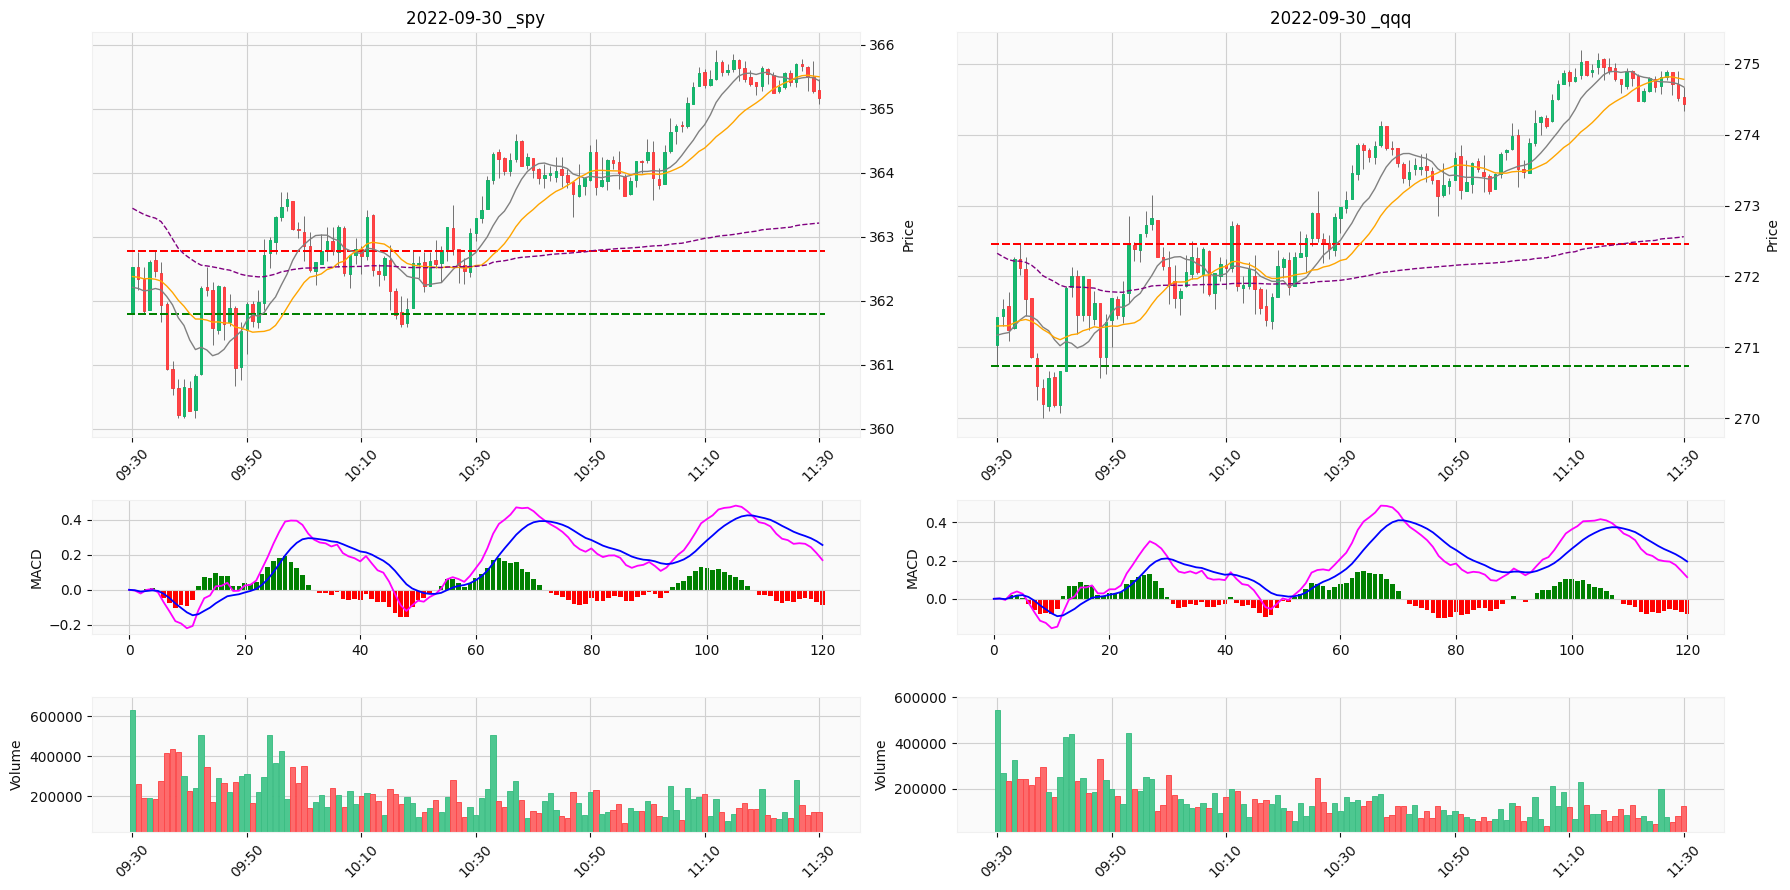

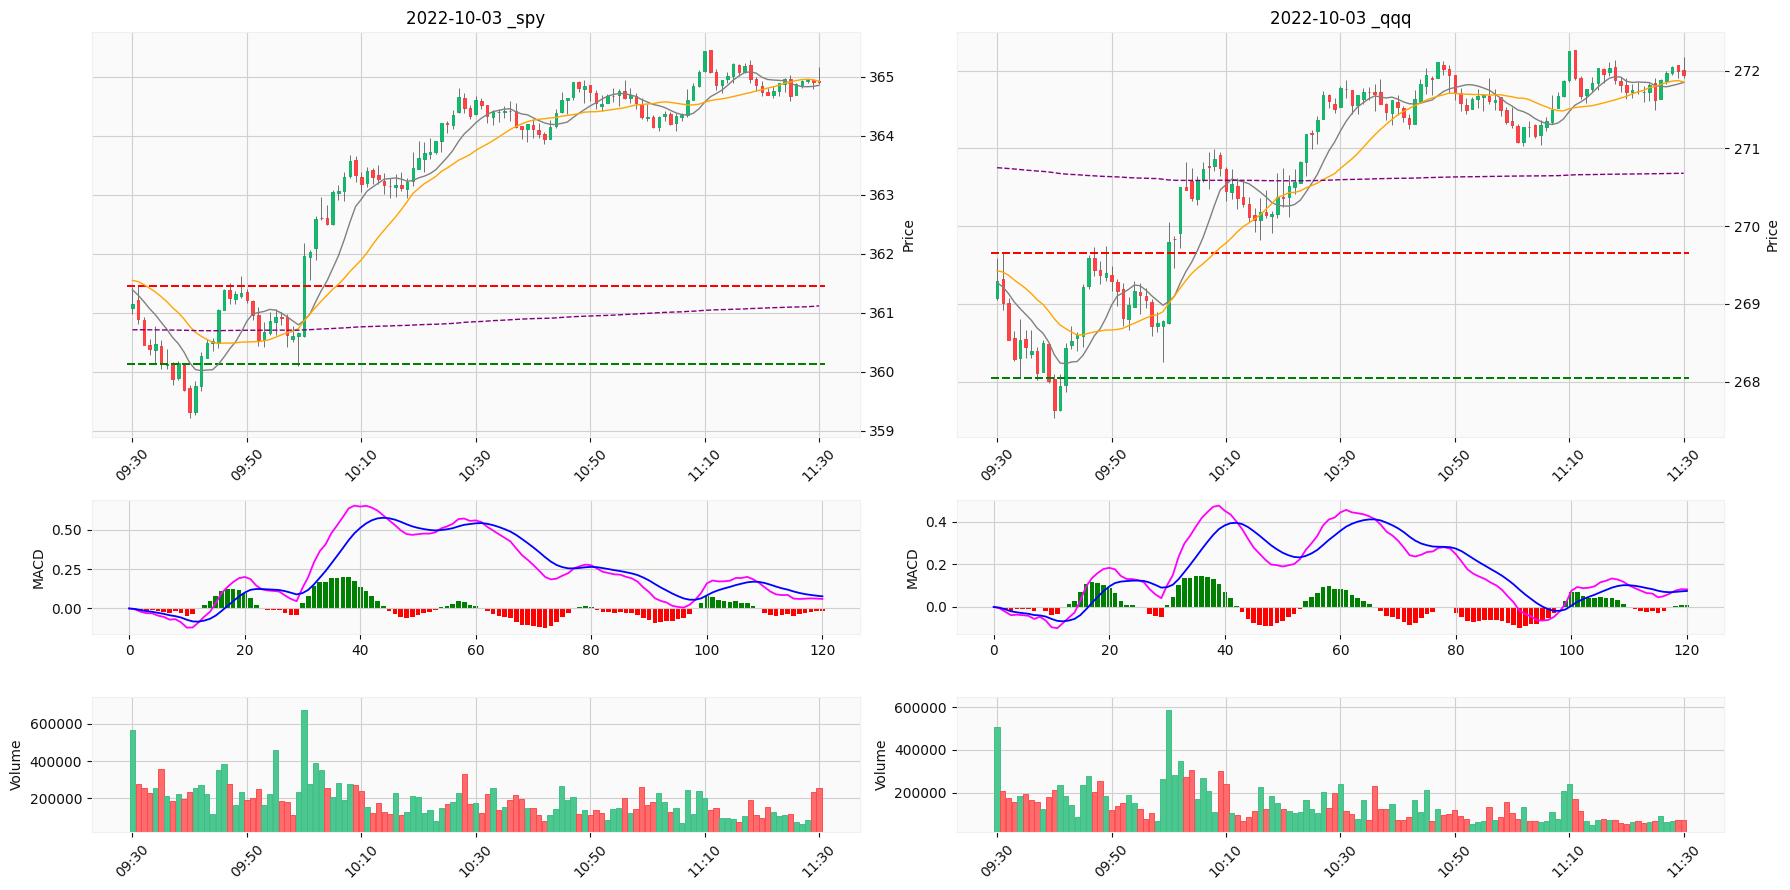

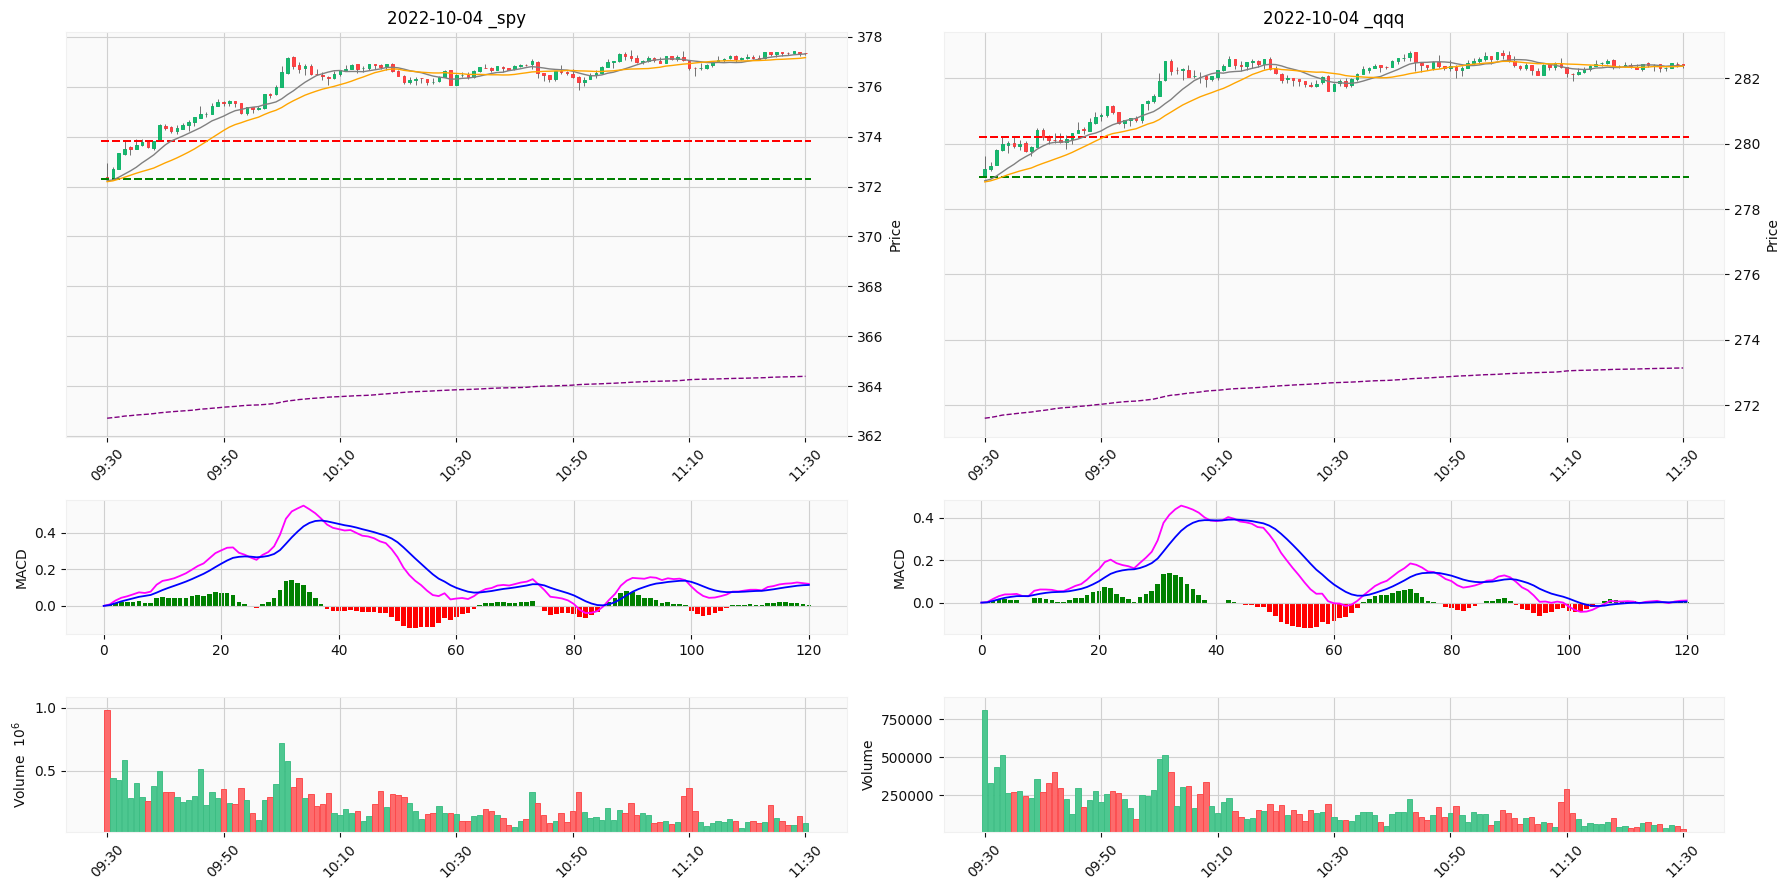

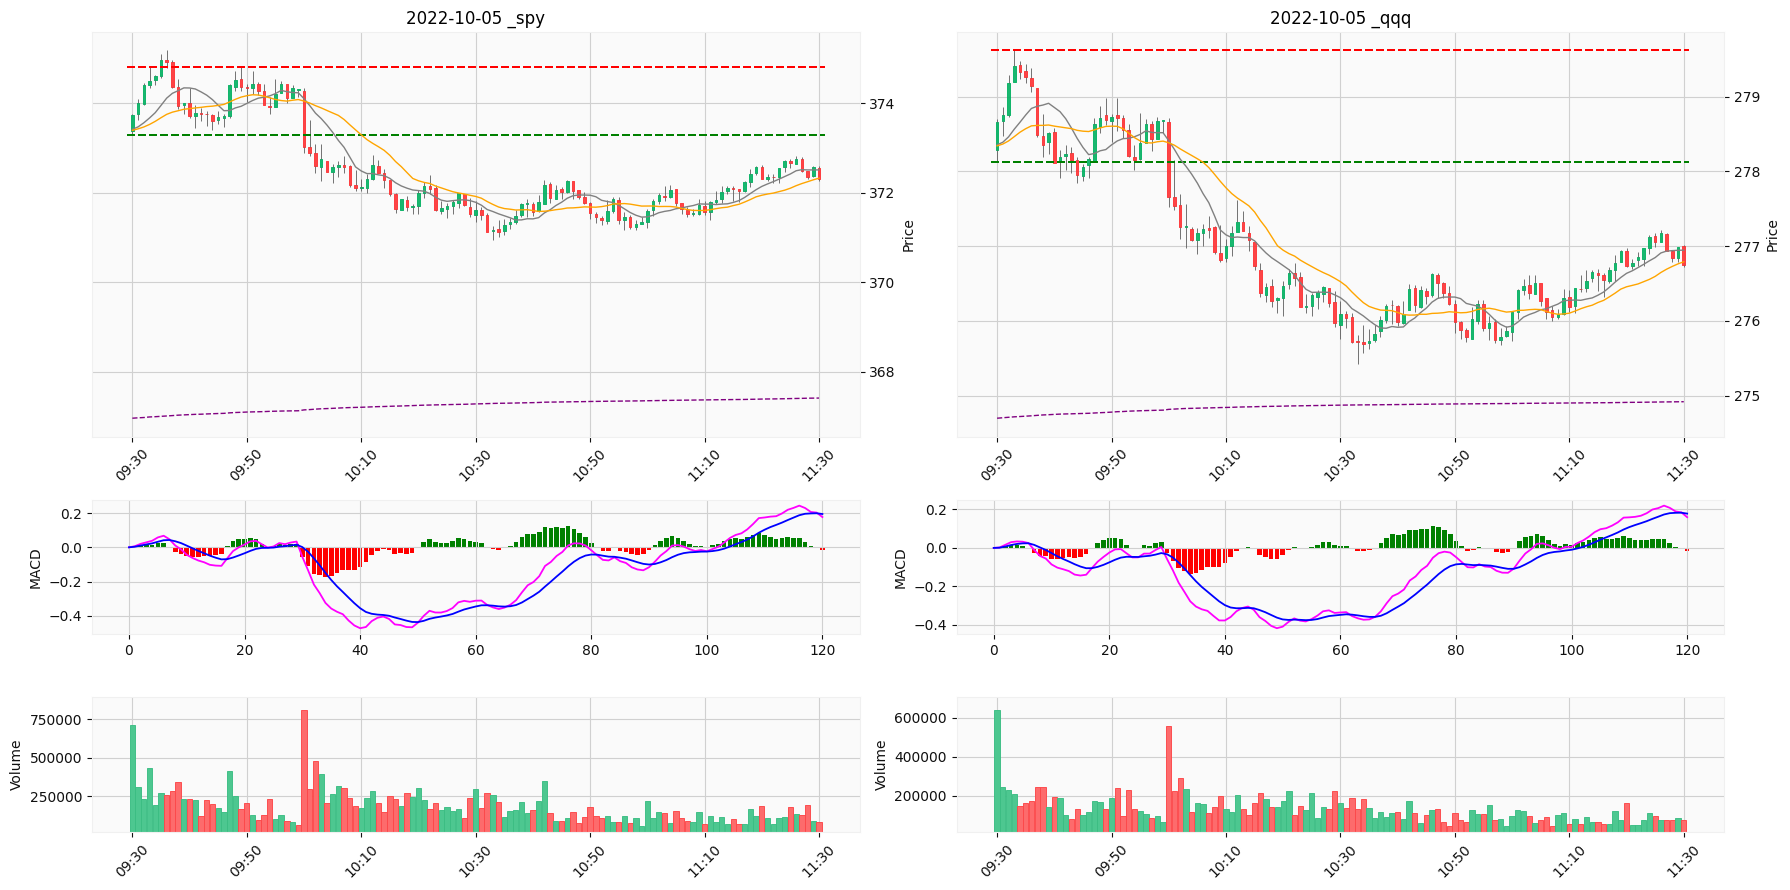

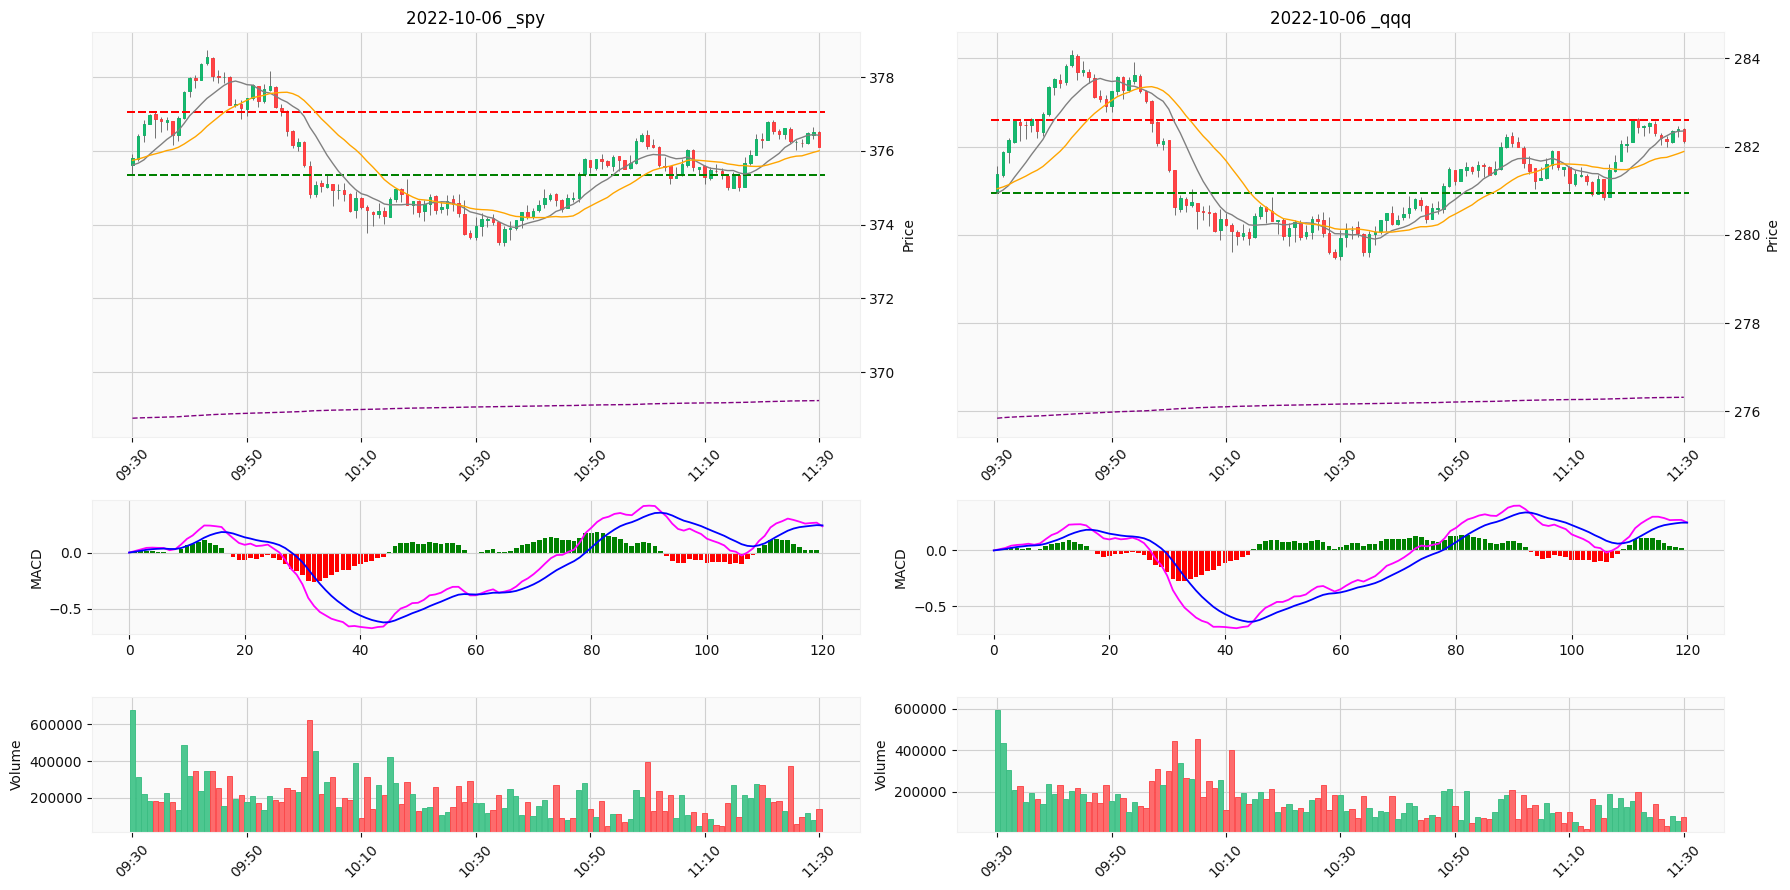

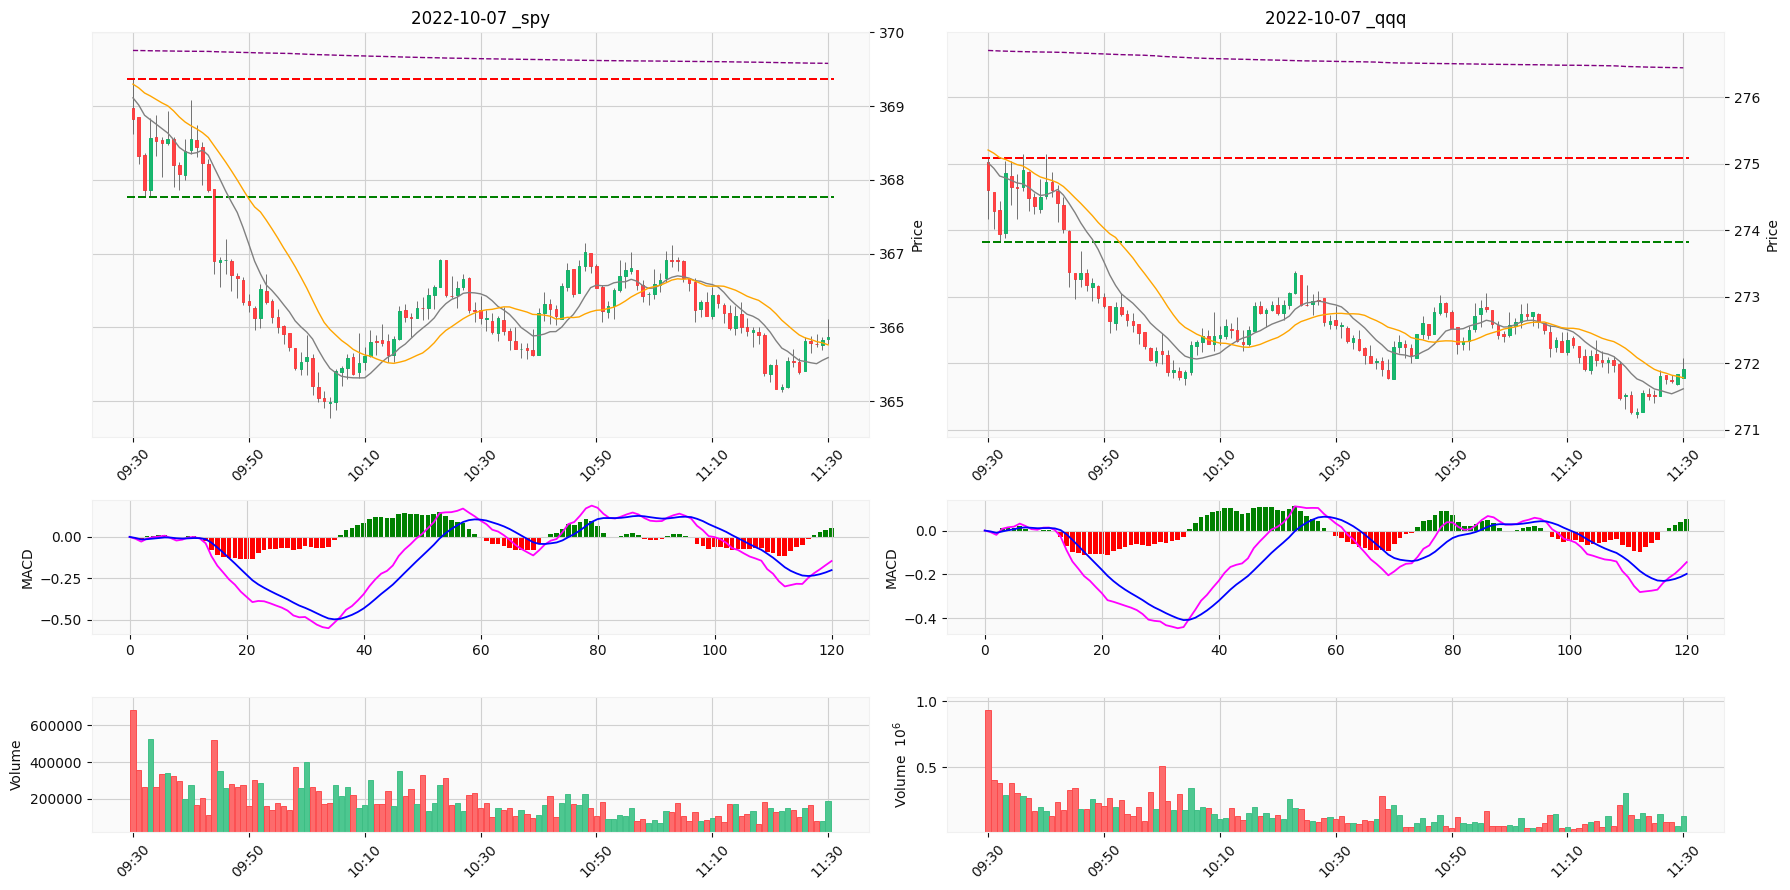

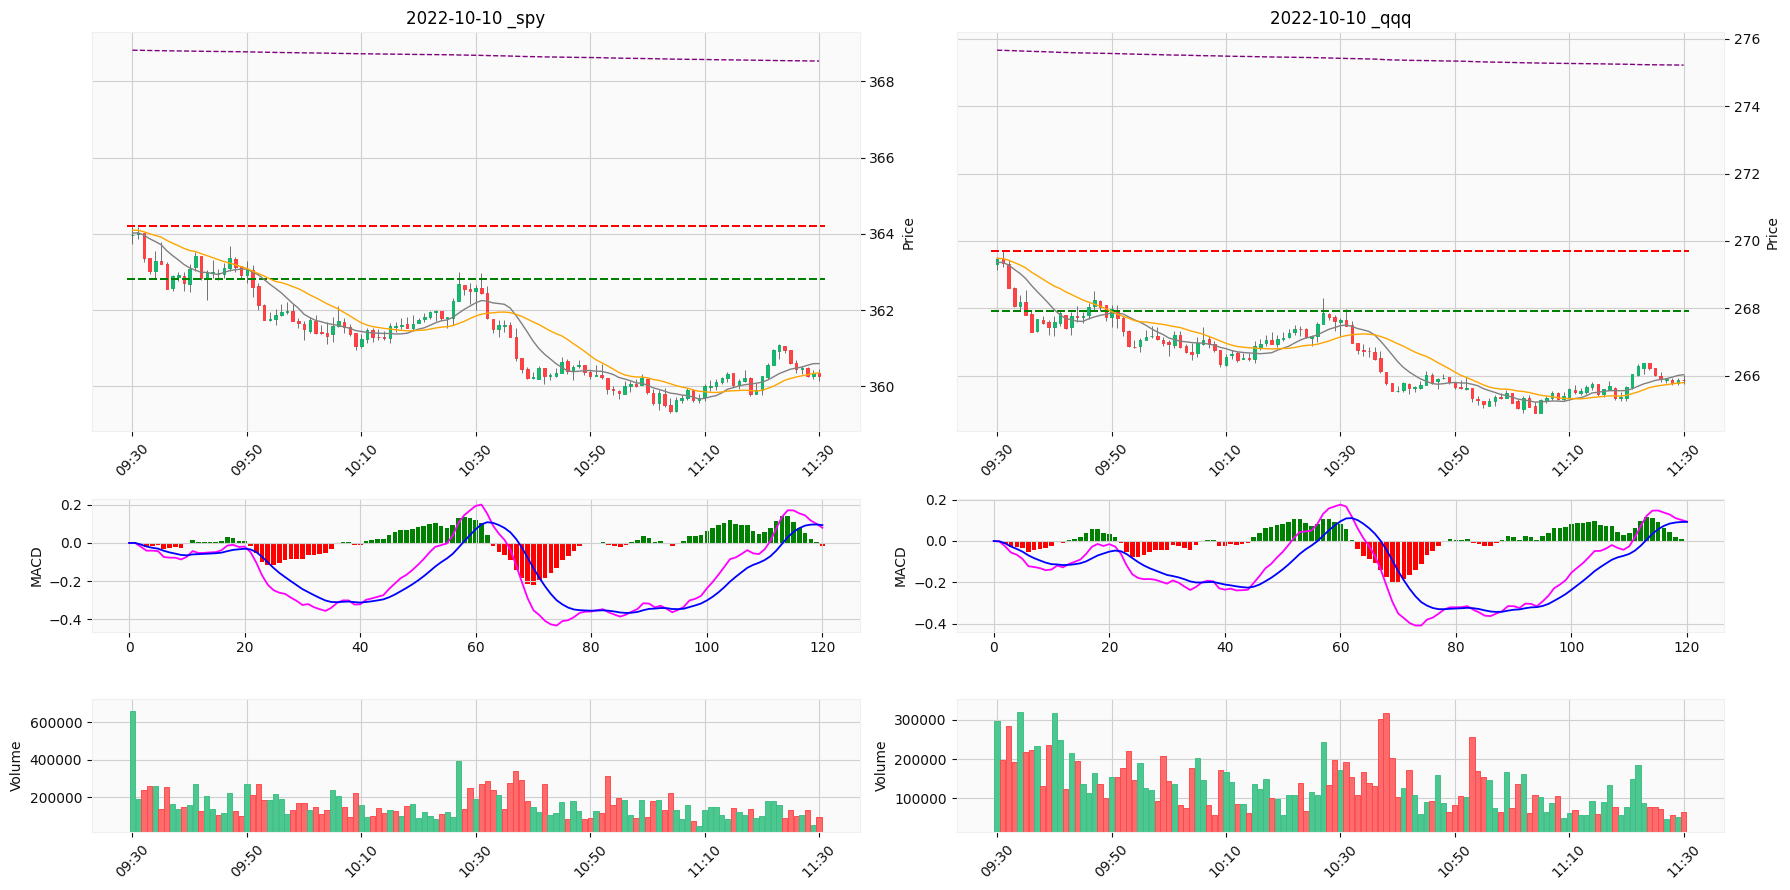

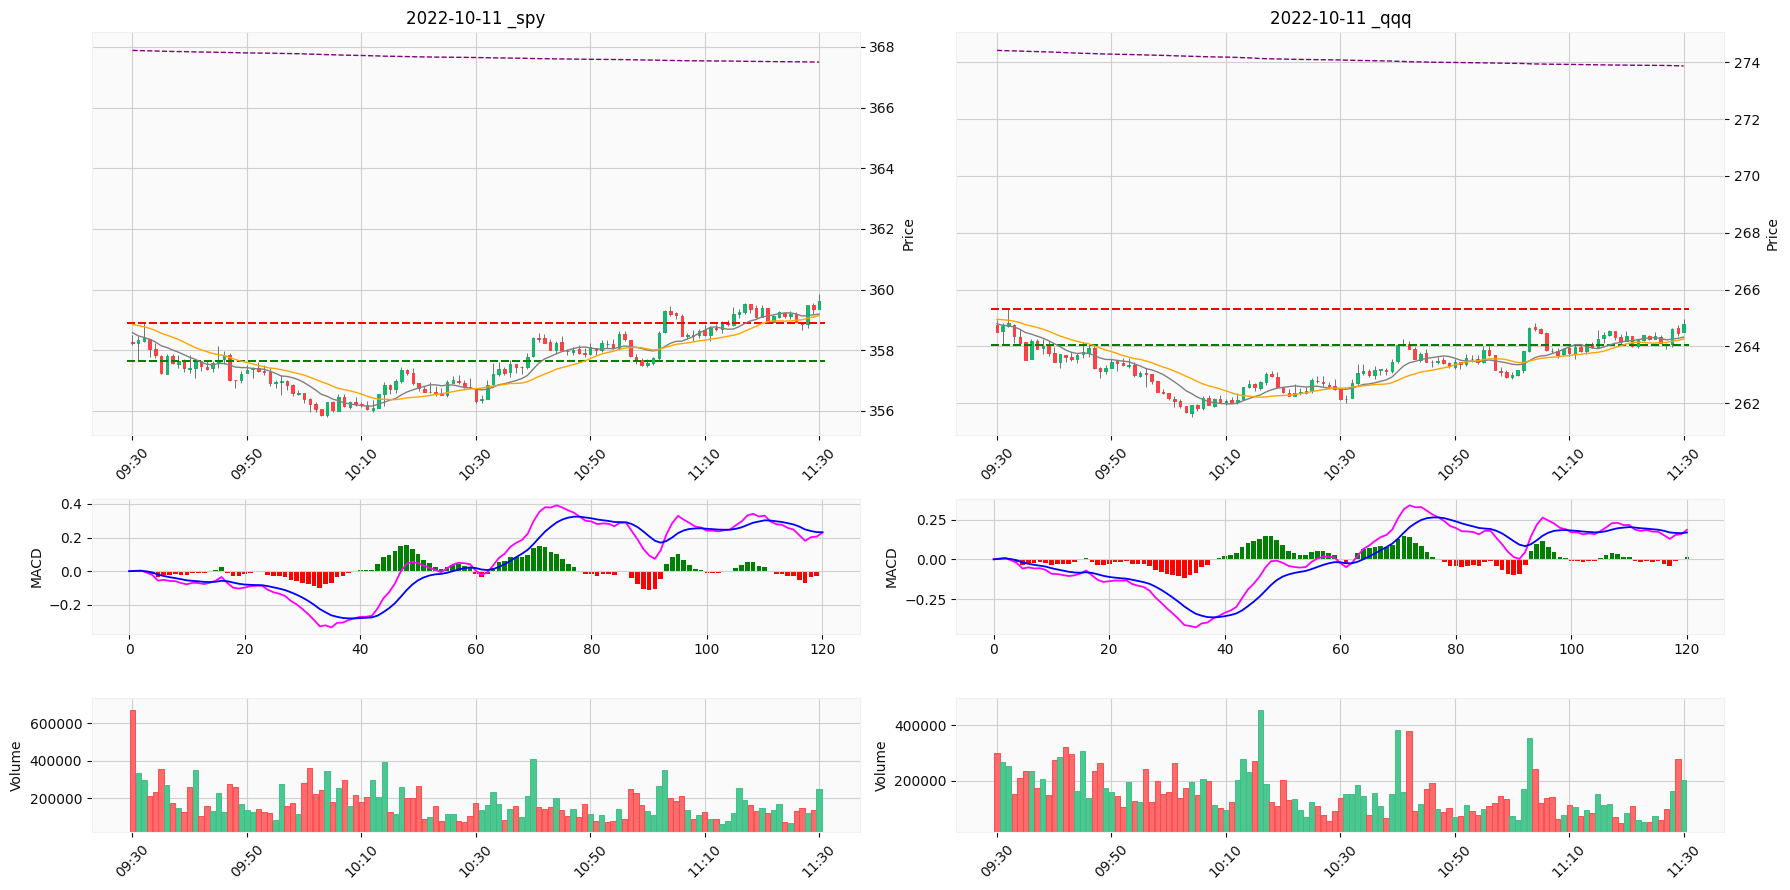

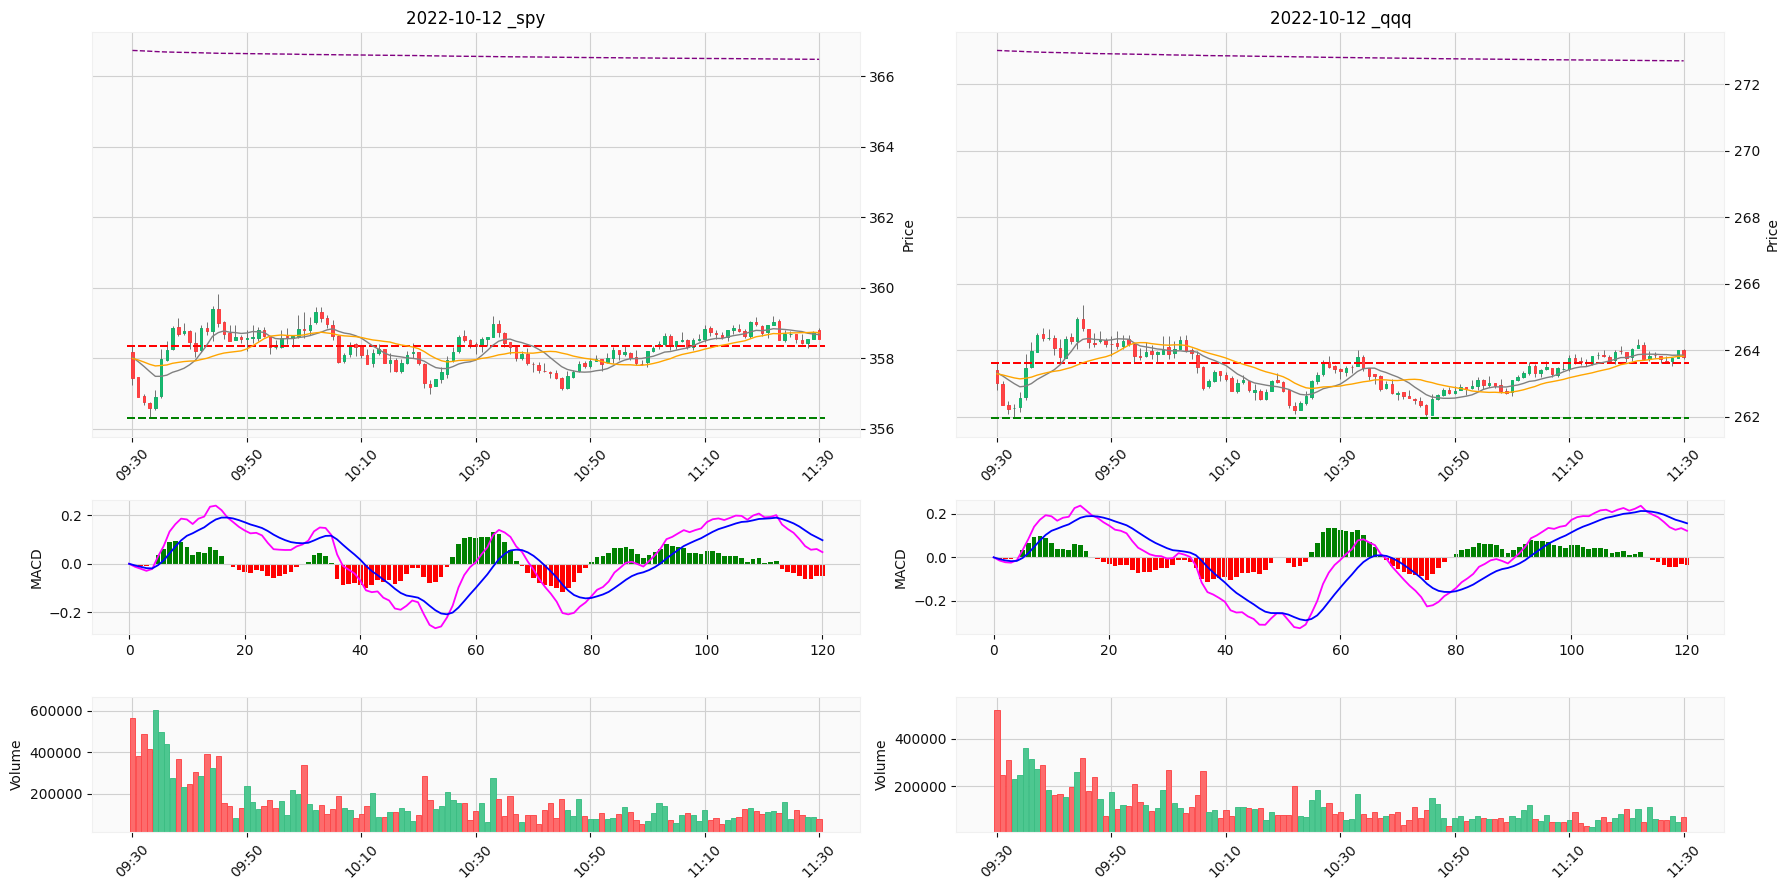

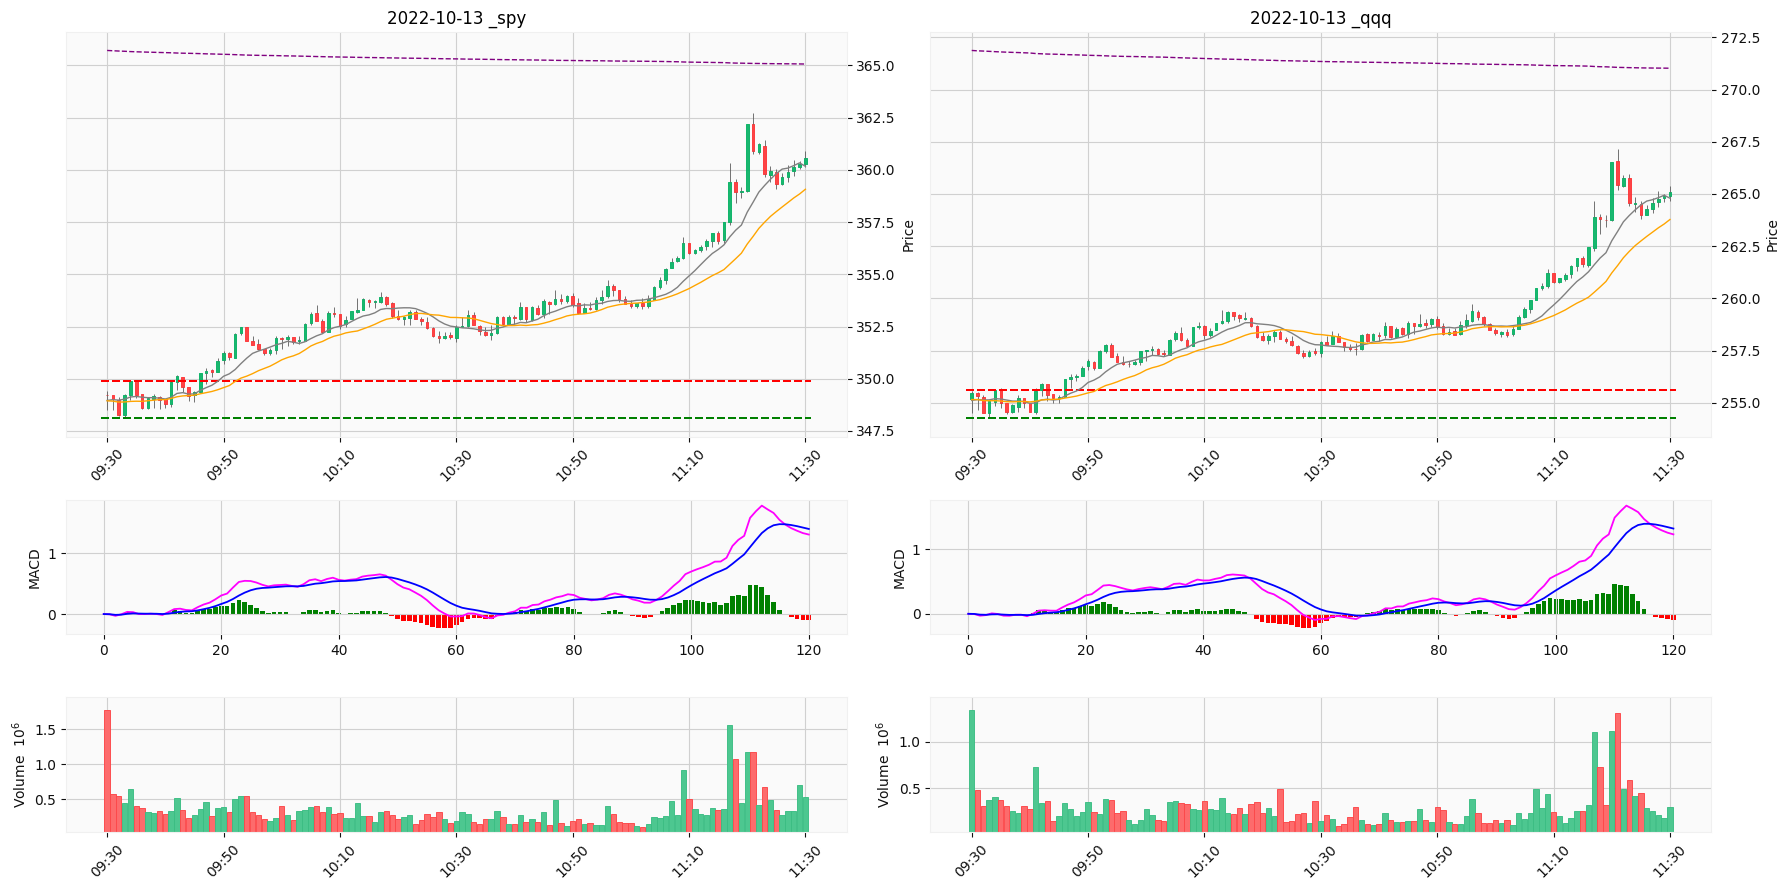

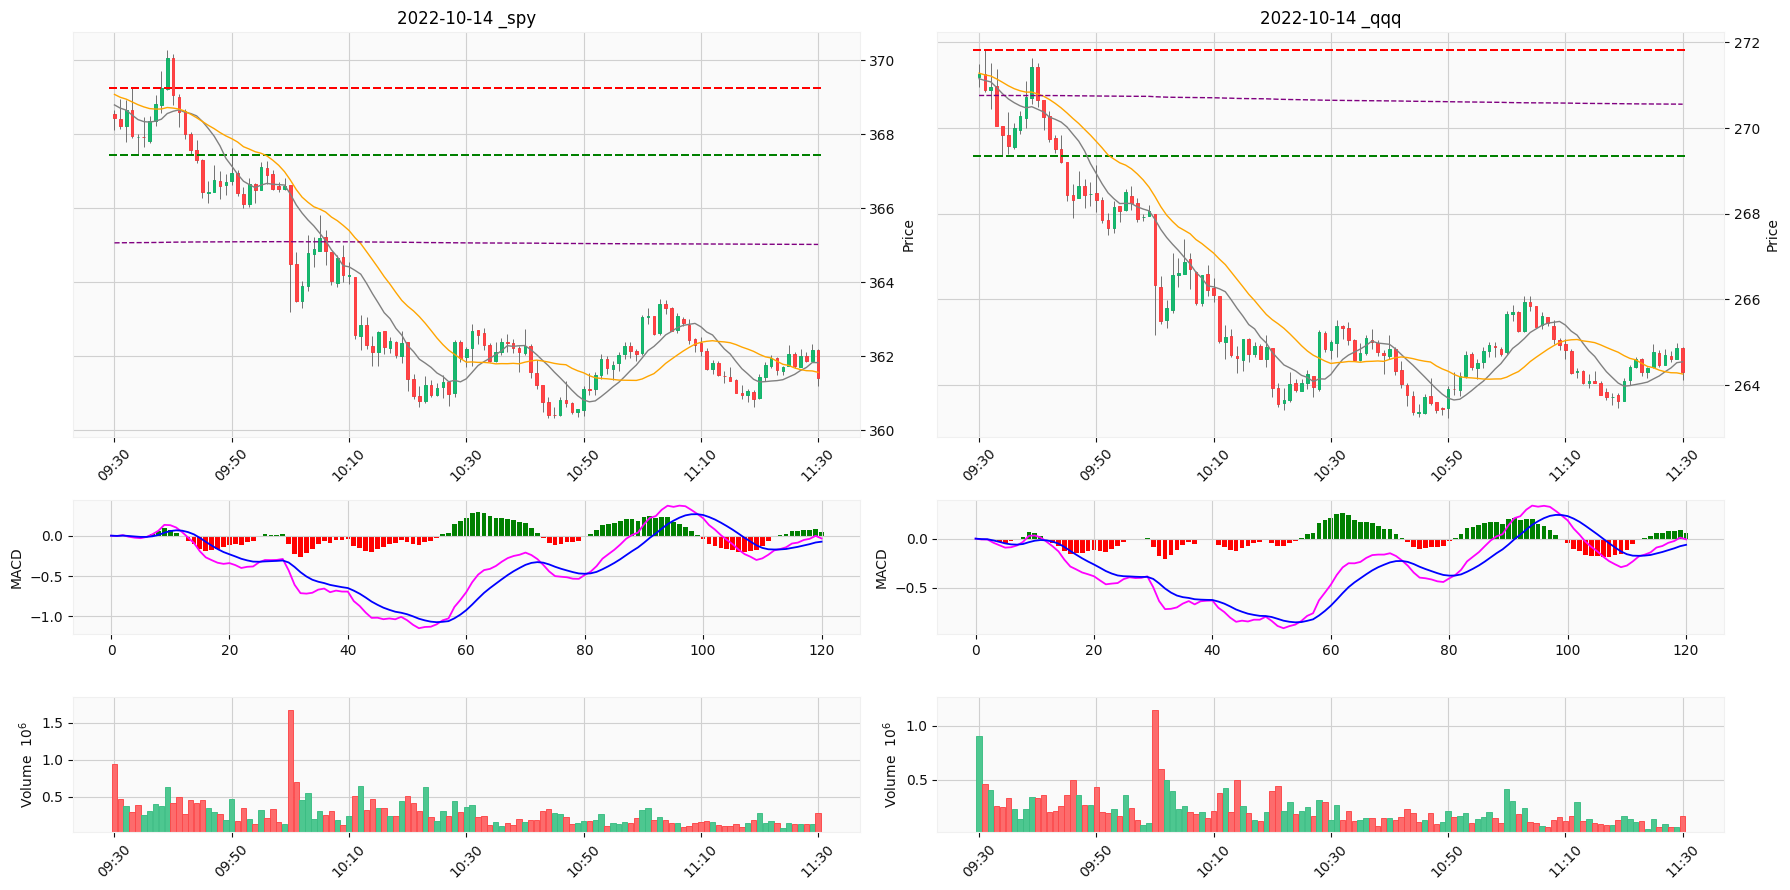

In [48]:
unique_days = df_qqq.index.normalize().unique()

for i, day in enumerate(unique_days):
    # # print(day)
    # if i > 10: 
    #     break
    # print("loc str: ", str(day)[:11] + "09:30:00")
    start_t = str(day)[:11] + "09:30:00"
    end_t = str(day)[:11] + "11:30:00"
    subset_qqq = df_qqq.loc[start_t: end_t]
    subset_spy = df_spy.loc[start_t: end_t]
    plot_side_by_side_v3(subset_qqq, subset_spy, save_dir="plots", fig_name=str(day)[:11]+".png")